## Credit Card Fraud Detection
Intro to topic:
Predict which transactions are normal vs. fraud. Datasets can many columns (from 30 to 500+) so we can do feature selection. Fraudulent 
transactions account for less than 5% so we datasets are unbalanced. Moreover, we can visualize normal vs. fraud clusters with t-sne/SVD/PCA. 

Pros:
- Opportunity to use multiple topics listed in project description
- Many features and potential to make a more complex project

Cons:
- For privacy reasons, some if not all features of datasets are not labeled.
- Datasets for credit card fraud are scarce and not publicly available


Topics used:
- feature selection for supervised learning
- techniques to deal with unbalanced datasets
- nonlinear dimensionality reduction with t-sne.

## To Do
<ol>
    <li>Feature Selection</li>
    <li>Transform columns not already transformed</li>
    <li>Removal of outliers</li>
    <li>Resampling (under-, over-sampling, & SMOTE) and Cost-sensitive learning Methods</li>
    <li>Visualizations with t-sne, pca, svd</li>
    <li>Implementation of models: decision tree, logistic regression, k-nearest neighbors, neural network</li>
    <li>Possibly implement deep learning model</li>
    <li>Compare performance of different models: ROC curves, PR curves, precision, recall, f1, top-k metric, etc.</li>
</ol>

* ~~create github~~
* ~~create subset of creditcard.csv for faster analysis~~
* replace ROC with precision-recall curves
* write a part about how imbalanced is imbalanced
* explain SMOTE

## Resources
<ol>
    <li>kaggle <a href="https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook">notebook</a> that analyses and makes a model for a dataset</li>
    <li>feature engineering kaggle <a href="https://www.kaggle.com/learn/feature-engineering">lesson</a> which could be useful for feature selection</li>
    <li>fraud detection online <a href="https://fraud-detection-handbook.github.io/fraud-detection-handbook/">book</a> which contains useful background/info on fraud detection</li>
    <li>GitHub <a href="https://github.com/amazon-science/fraud-dataset-benchmark?tab=readme-ov-file#data-sources">repo</a> with financial fraud datasets</li>
    <li>ieee-cis <a href="https://www.kaggle.com/c/ieee-fraud-detection/overview">dataset</a></li>
    <li>another <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data">dataset</a></li>
    <li>https://www.ic.unicamp.br/~wainer/cursos/1s2021/432/2013_Book_AppliedPredictiveModeling.pdf</li>
</ol>

## Code Below
Following the analysis of the dataset of bullet point (1.) under Resources section for better understanding. After understanding and analyzing the dataset, I am thinking to analyze the ieee-cis dataset for the project.

## Possible steps for ml pipeline
<ol>
    <li>Preprocessing of data</li>
    <li>Exploratory data analysis</li>
    <li>Feature engineering</li>
    <li>Imbalance method</li>
    <li>Model training</li>
    <li>Model evaluation</li>
</ol>

* Preprocessing
  * Check for null values
  * Normalize data
* Exploratory data analysis
  * Visualize clusters with T-SNE
  * Correlation Matrices
  * Visualize distribution of features
* Feature selection 
  * By mi-scores 
  * Recursive Feature Elimination (RFE)
* Imbalance method 
  * Sampling methods 
    * Undersampling 
    * Oversampling methods
    * Combination such as SMOTE
  * Cost sensitive learning
* Model 
  * Logistic Regression
  * SVM
  * Random Forest
* Evaluation 
  * Area Under Curve of ROC: integrate $\int_0^1r(x)dx$ with trapezoidal rule
  * Learning curves: check for overfitting
  * K-fold cross validation

$$ \text{Preprocessing} \rightarrow \text{Exploratory data analysis} \rightarrow \text{Feature selection} \times \text{Imbalance method} \times \text{Model} \rightarrow \text{Evaluation}$$

If we have n types of feature selections, m types of imbalance methods, and p types of models, then altogether there are $n \times m \times p$ results to compare.

## 3. Define a Project
1. Describe well the new model that you are using.
2. What is your data set about?
3. Clean up your data and reduce it if your dataset is very large.
4. What is exactly your research question? What do you want to learn from data? What is your learning model ,e.g., a Classification, Clustering, etc?
5. What is your current expectations about the results? Why?
6. Describe how you evaluate your project? How to access the correctness of your model? How well would you expect that the model will work?

## 4. Implementation
*  You need to implement your project in python. You are allowed to use any Machine Learning Library like scikit-learn1. You are also allowed to implement your project without using any libraries.
*  You can use Jupyter Notebooks to implement your project and provide your documentations.
*  You code should be completed and be compilable without any errors. We should be able to read your documents, and be able to run your project.
*  Run your implementation (on your Laptop or on Cluster if data is large) and generate the results.
*  Provide the interpretations of your results.
*  What can you do to improve your results? Apply your ideas to improve your results.
*  Provide any references that you have used


In [1]:
# $\text{Preprocessing} -> \text{Exploratory data analysis} -> \text{feature selection} \cross \text{imbalance method} \cross \text{model}$
# Imported Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
#from sklearn.metrics import classification_report, roc_auc_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, make_scorer
from sklearn.metrics import roc_curve, auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")

## Download Data

In [ ]:
# Load original dataset
# df = pd.read_csv("creditcard.csv")
# Downloading 1/10 subset of the original dataset to reduce training time
df = pd.read_csv("creditcard10.csv")
# View first few rows
pd.set_option('display.max_columns', None)
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
1   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
2   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
3   31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
4   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.292491 -0.523020  0.358468  0.070050 -0.854023  0.547347  0.616448   
1  0.321552  0.435975 -0.704298 -0.600684  0.096501  0.710309  0.778924   
2  0.706252 -0.064966 -0.463271 -0.528357 -0.813214  0.111898  1.133875   
3  0.681867 -0.031641  0.383872  0.334853  0.905210 -0.277872 -1.336179   
4  0.373692 -0.287204 -0.084482 -0.696578  0.101512 -0.433200 -0.634867   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.101785 -0.608492 -0.288559 -0.606199 -0.900746 -0.201311 -0.196039   
1  0.353867  0.953048 -0.103542  0.128899 -0.964070 -0.477130 -0.009041   
2 -0.649766  0.861035  0.583787 -0.344094  0.028312  0.219760  0.206028   
3 -0.012238  0.212828  0.769345 -1.010534  0.357288 -0.125585  0.315823   
4 -1.188354  1.028063  0.576121  1.068353  0.332690 -0.362811 -0.105286   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.075208  0.045536  0.380739  0.023440 -2.220686 -0.201146  0.066501   
1 -0.128619 -0.368565  0.090660  0.401147 -0.261034  0.080621  0.162427   
2 -0.305402 -0.774704 -0.123884 -0.495687 -0.018148  0.121679  0.249050   
3 -0.220815 -0.419013 -0.239197  0.009967  0.232829  0.814177  0.098797   
4 -0.160161 -0.430404 -0.076738  0.258708  0.552170  0.370701 -0.034255   

        V28  Amount  Class  
0  0.221180    1.79      0  
1  0.059456    1.98      0  
2  0.092516    0.89      0  
3 -0.004273   15.98      0  
4  0.041709    0.76      0

In [3]:
df.describe()

Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334985      1.237249      1.204102      1.098006   
min      -42.147898    -19.996349    -22.291962    -33.785407     -8.739670   
25%       -0.703986     -0.765807     -0.562033     -0.208445     -0.632488   
50%       -0.068037     -0.269071      0.028378      0.024696     -0.037100   
75%        0.603574      0.398839      0.559428      0.326057      0.621093   
max       28.762671     22.529298     36.677268     19.587773      8.141560   

                V10           V11           V12           V13           V14  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.000087     -0.005249     -0.002604     -0.000882      0.000232   
std        1.079336      1.017822      0.997930      1.000016      0.957137   
min      -18.271168     -4.010268    -18.553697     -3.881106    -18.049998   
25%       -0.537540     -0.759095     -0.413143     -0.652716     -0.420510   
50%       -0.092191     -0.032064      0.137128     -0.014223      0.047737   
75%        0.463517      0.728819      0.613894      0.664333      0.488139   
max       12.901627     11.228470      4.403899      3.856013      7.421944   

                V15           V16           V17           V18           V19  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.006648     -0.004124      0.003102      0.003878      0.006141   
std        0.909213      0.878617      0.851470      0.842182      0.818276   
min       -3.936008    -12.427961    -21.017898     -8.397393     -7.213527   
25%       -0.578520     -0.478390     -0.482639     -0.498078     -0.453520   
50%        0.057400      0.061507     -0.065868     -0.001276      0.009489   
75%        0.655780      0.520919      0.406402      0.498578      0.461960   
max        5.685899      6.098529      9.253526      5.041069      4.369712   

                V20           V21           V22           V23           V24  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.001117      0.004740      0.006719     -0.000494     -0.002626   
std        0.803658      0.744743      0.728209      0.645945      0.603968   
min      -21.028272    -16.640785    -10.933144    -30.269720     -2.752263   
25%       -0.211025     -0.224842     -0.535877     -0.163047     -0.360582   
50%       -0.062606     -0.029075      0.014337     -0.012678      0.038383   
75%        0.135337      0.189068      0.533936      0.148065      0.434851   
max       39.420904     22.588989      6.090514     15.626067      3.944520   

                V25           V26           V27           V28        Amount  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.000917      0.004762     -0.001689     -0.004154     89.957884   
std        0.520679      0.488171      0.418304      0.321646    270.894630   
min       -7.025783     -2.534330     -8.260909     -9.617915      0.000000   
25%       -0.319611     -0.328476     -0.071712     

In [4]:
print(df['Class'].value_counts())
print(f"{df[df['Class'] == 1].shape[0] / df.shape[0] * 100:.2f}% of the data is fraud")

Class
0    28432
1       49
Name: count, dtype: int64
0.17% of the data is fraud


## Check for Null Values

In [5]:
# Check for NA values across columns. Since array is all zeroes, there are no NA values
df.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

## Distribution of Original Data
### Histograms
From the histograms below, we see the features have a bell-shaped distribution and roughly have mean of zero.

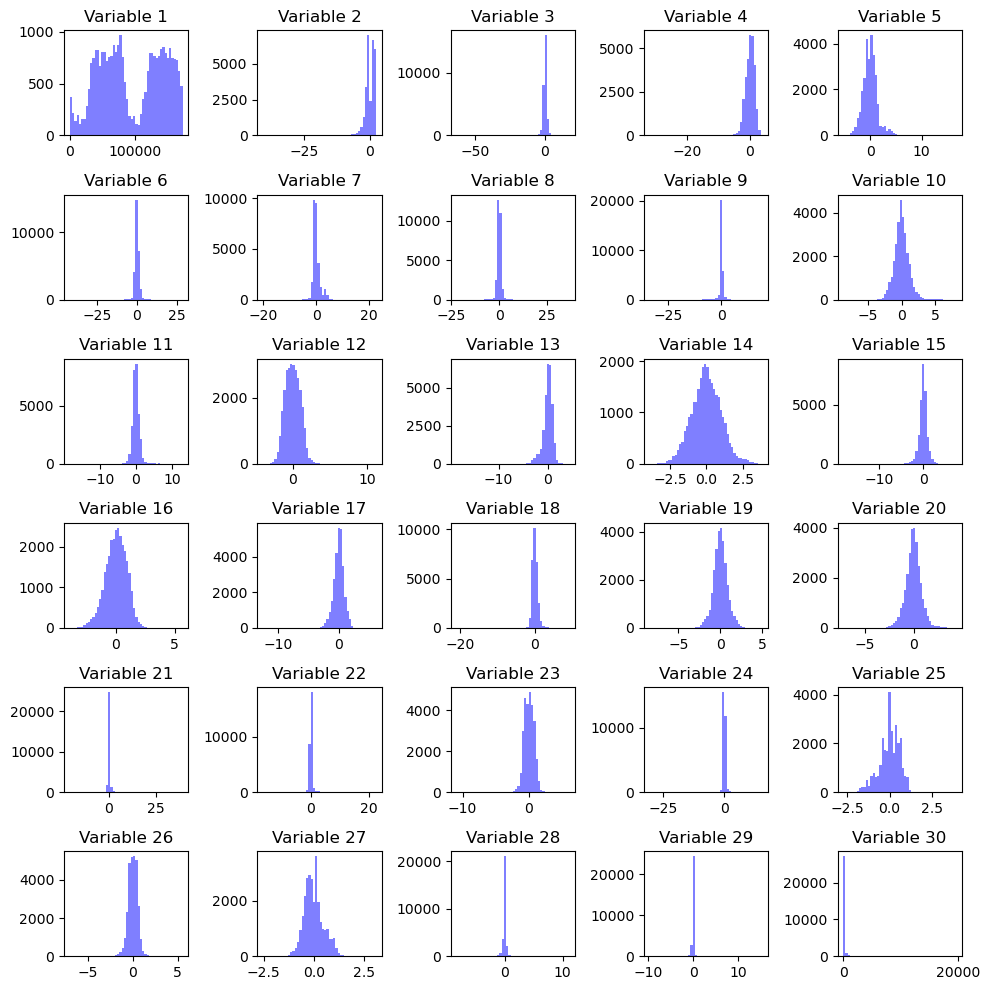

In [6]:
# Check distribution with histogram of each feature
# Note most variables seem to have mean of 0 with exception of Variable 1 (94813.86), and Variable 29 (88.35)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(10, 10))

# Iterate through the grid and create scatter plots
for i in range(6):
    for j in range(5):
        axes[i, j].hist(df.iloc[:, 5*i + j], bins=50, alpha=0.5, color='blue', label='Variable ' + str(5*i+j+1))
        axes[i, j].set_title(f'Variable {5*i+j+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Boxplots
From the boxplots below, we see there are many points that are "outliers", that is outside $\text{Q2} \pm 1.5 \times \text{IQR} $

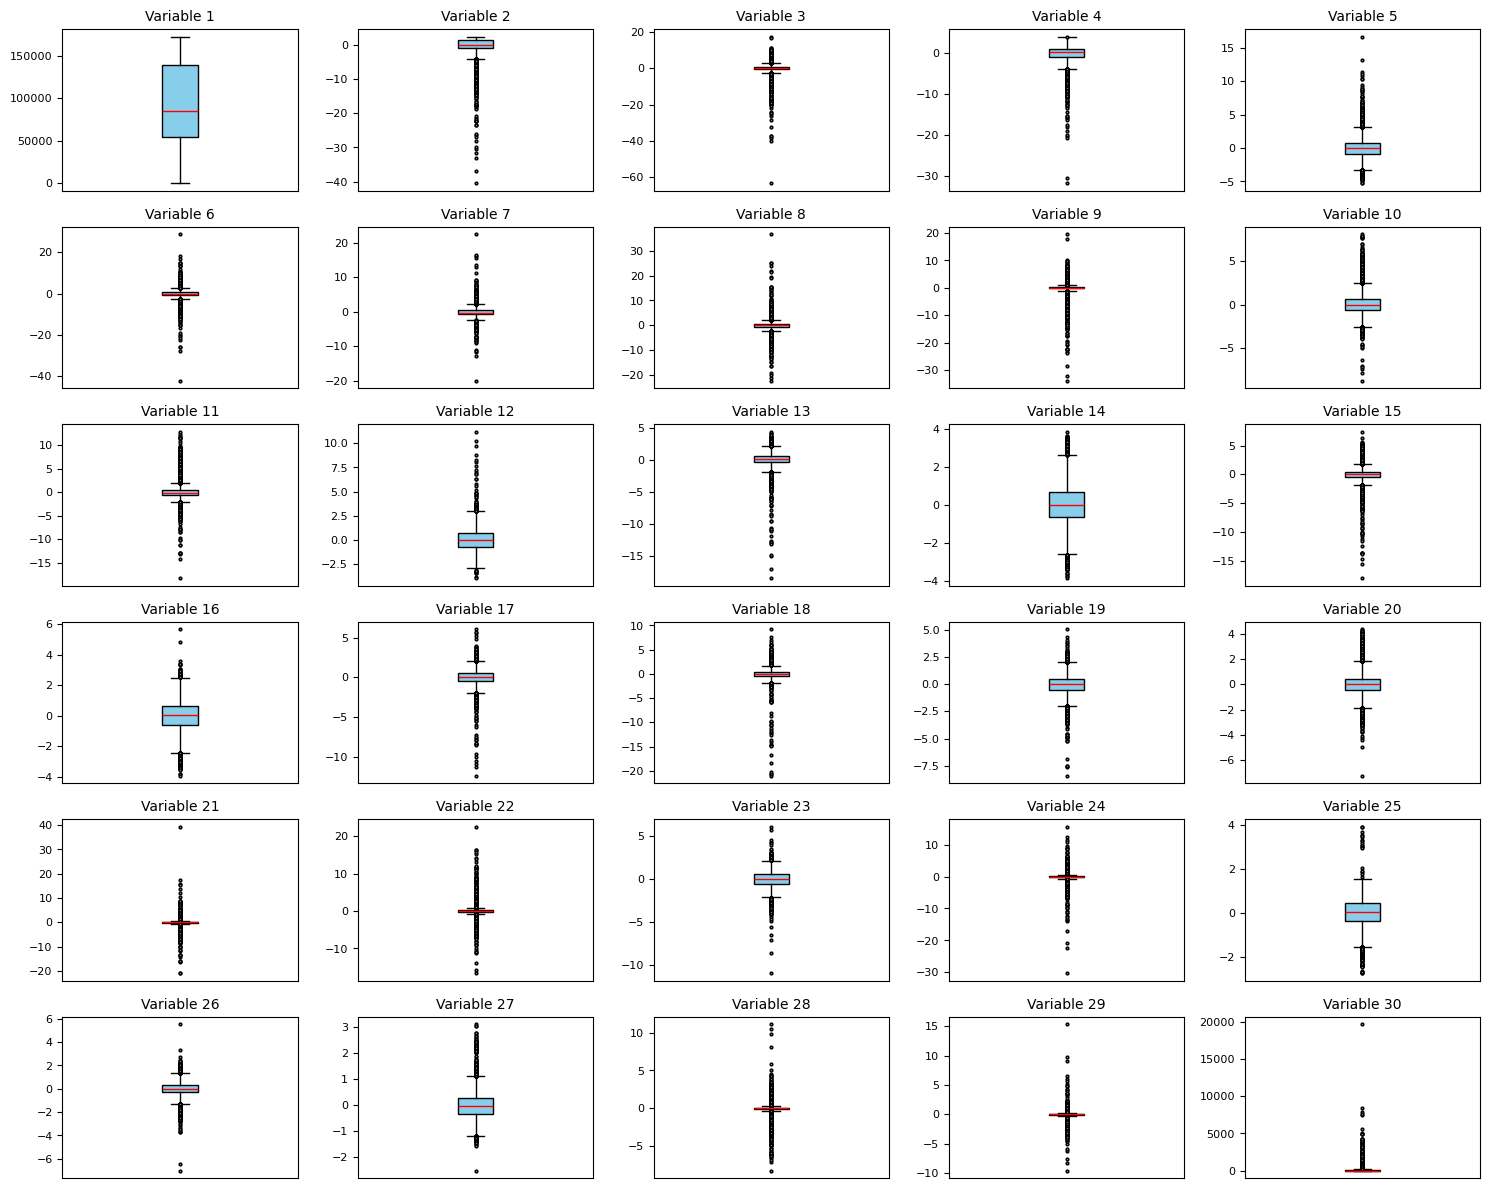

In [7]:
import matplotlib.pyplot as plt

# Visualize the distribution of each feature using box plots
# Each black dot in each box plot represents an outlier. There are a lot of "outliers" in the data
# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust figsize as needed

# Iterate through the grid and create box plots
for i in range(6):
    for j in range(5):
        idx = 5 * i + j
        if idx >= df.shape[1]:
            axes[i, j].axis('off')  # Turn off empty subplots
            continue
        axes[i, j].boxplot(df.iloc[:, idx], vert=True, patch_artist=True,
                           boxprops=dict(facecolor='skyblue', color='black'),
                           medianprops=dict(color='red'),
                           whis=1.5,
                           flierprops=dict(marker='o', markersize=2, linestyle='none', markerfacecolor='gray'))
        axes[i, j].set_title(f'Variable {idx+1}', fontsize=10)
        axes[i, j].tick_params(labelsize=8)
        axes[i, j].set_xticks([])  # Hide x-axis labels for cleanliness

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Scatterplot of means and standard deviations of features
The 1st feature 'Time' and 30th feature 'Amount' have means and variances much higher than other features. The left scatter plot excludes them. The right includes them with a log scale--they are the two right- and upper-most points.

Feature 1
Mean: 94705.04, Std: 47584.73
Feature 30
Mean: 89.96, Std: 270.89


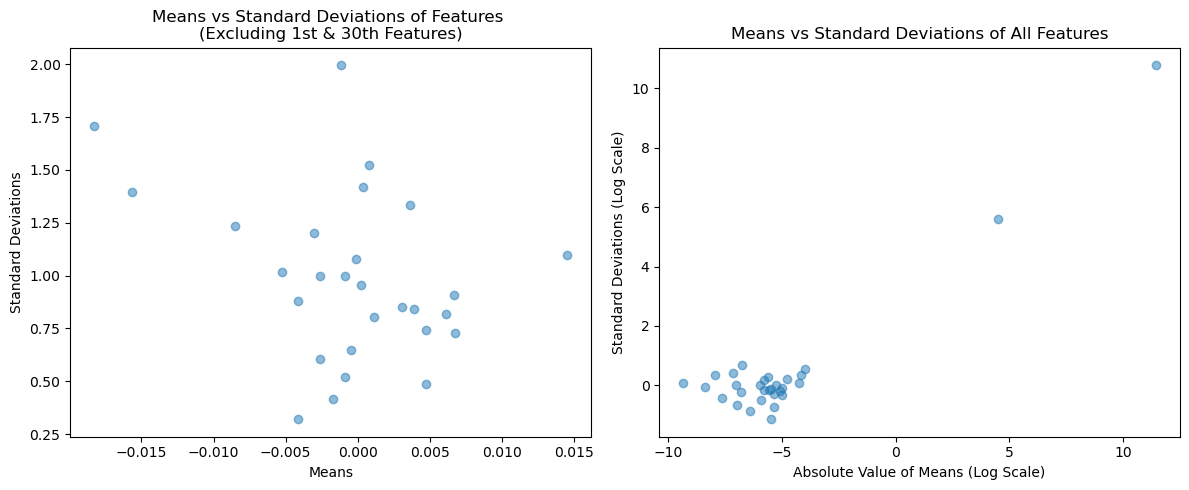

In [8]:
# Means are close to zero, but standard deviations are not close to 1 with exception of 1st and 30th features
# Can see these points on the log scale in the scatter plot to the right
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
X = df.iloc[:, 0:-1]
means = X.mean().to_numpy()
stds = X.std().to_numpy()
print('Feature 1')
print(f'Mean: {means[0]:.2f}, Std: {stds[0]:.2f}')
print('Feature 30')
print(f'Mean: {means[29]:.2f}, Std: {stds[29]:.2f}')
axes[0].scatter(means[1:-1], stds[1:-1], alpha=0.5)
axes[0].set_xlabel('Means')
axes[0].set_ylabel('Standard Deviations')
axes[0].set_title('Means vs Standard Deviations of Features \n(Excluding 1st & 30th Features)')
# Use log scale for better visualization
axes[1].scatter(np.log(np.abs(means)), np.log(stds), alpha=0.5)
axes[1].set_xlabel('Absolute Value of Means (Log Scale)')
axes[1].set_ylabel('Standard Deviations (Log Scale)')
axes[1].set_title('Means vs Standard Deviations of All Features')
plt.tight_layout()
plt.show()

## Normalization of data
Most features have mean around 0 and are bell-shaped distributions

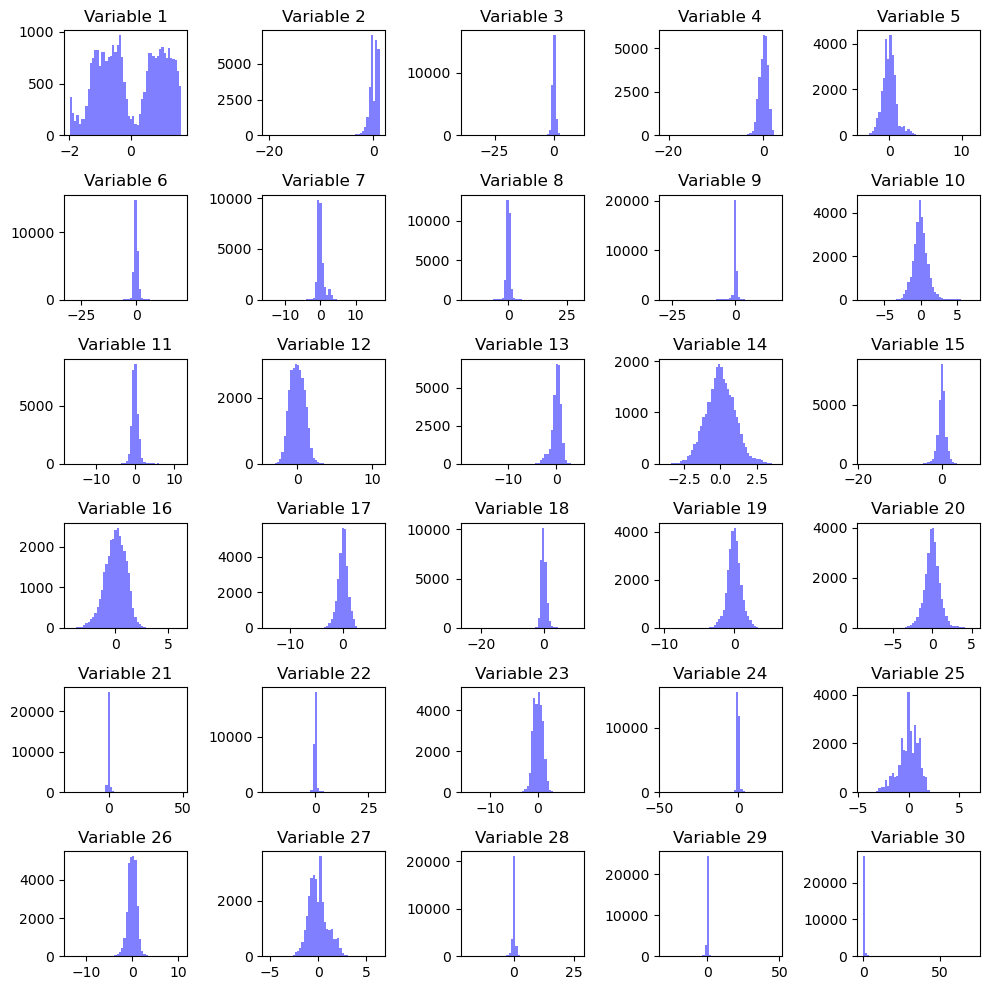

In [9]:
# Standardize all features
scaler = StandardScaler()
#rob_scaler = RobustScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Class']))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['Class'] = df['Class']
df_scaled.head()

# Check distribution of each feature
# Note most variables seem to have mean of 0 with exception of Variable 1 (94813.86), and Variable 29 (88.35)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(10, 10))

# Iterate through the grid and create scatter plots
for i in range(6):
    for j in range(5):
        axes[i, j].hist(df_scaled.iloc[:, 5*i + j], bins=50, alpha=0.5, color='blue', label='Variable ' + str(5*i+j+1))
        axes[i, j].set_title(f'Variable {5*i+j+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

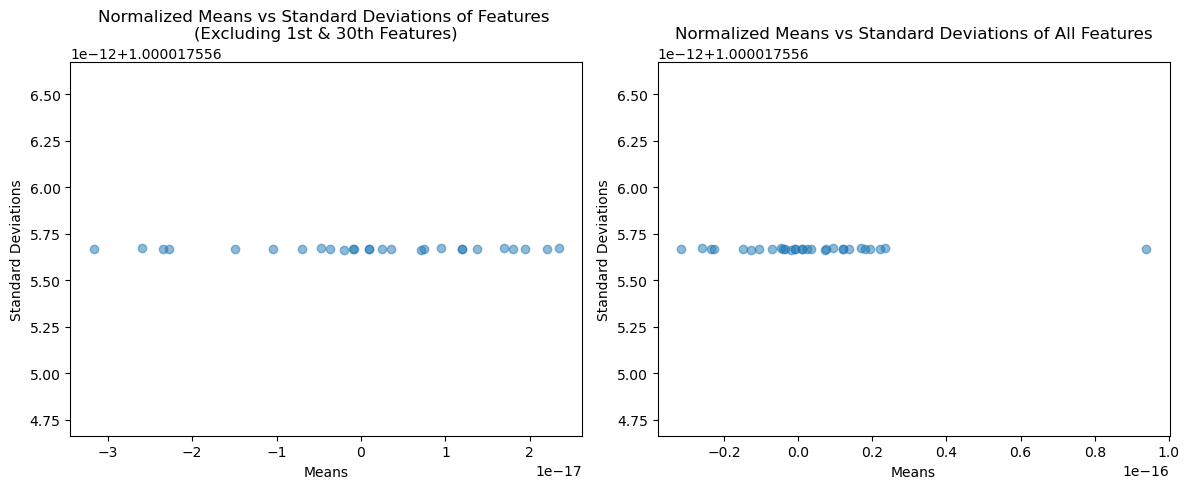

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Means and standard deviations are now close to 0 and 1 respectively
X = df_scaled.iloc[:, 0:-1]
means = X.mean().to_numpy()
stds = X.std().to_numpy()
axes[0].scatter(means[1:-2], stds[1:-2], alpha=0.5)
axes[0].set_xlabel('Means')
axes[0].set_ylabel('Standard Deviations')
axes[0].set_title('Normalized Means vs Standard Deviations of Features \n(Excluding 1st & 30th Features)')
#plt.scatter(means[1:-2], stds[1:-2], alpha=0.5)
axes[1].scatter(means, stds, alpha=0.5)
axes[1].set_xlabel('Means')
axes[1].set_ylabel('Standard Deviations')
axes[1].set_title('Normalized Means vs Standard Deviations of All Features')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis
## Visualize clusters with t-sne
t-sne compresses points in a high-dimensional feature space to a 2D or 3D space while preserving pairwise distances. It allows us to see if fraud/normal transactions are separable. Below are 2D and 3D visualizations. The 3D plot is interactive. You can rotate with your cursor. From the visualizations below, we find that the classes are fairly separable.

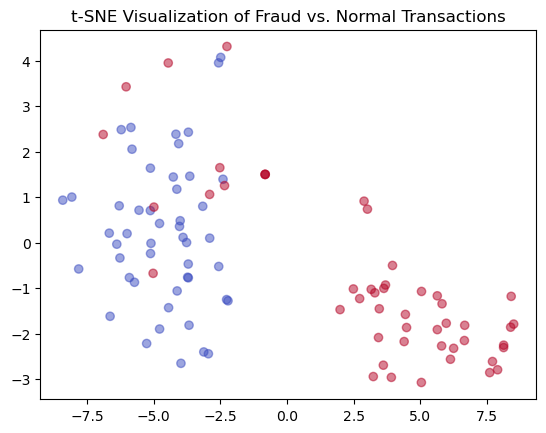

In [47]:
# 2D TSNE
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_resampled)

#x_jittered = x + np.random.normal(loc=0, scale=0.05, size=len(x))
# Add jitter to the x-coordinates and y-coordinates

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_resampled, cmap="coolwarm", alpha=0.5)
plt.title("t-SNE Visualization of Fraud vs. Normal Transactions")
plt.show()

Add jitter to prevent points from overlapping

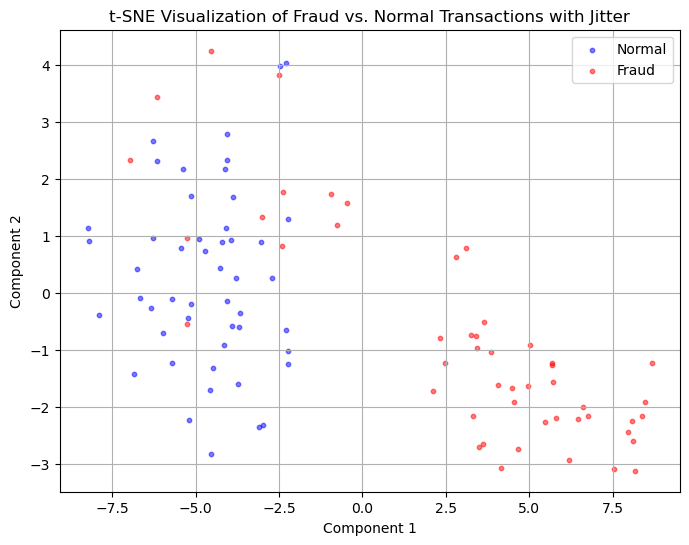

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Add jitter
x_jittered = X_embedded + np.random.normal(loc=0, scale=0.2, size=X_embedded.shape)

# Create the plot
plt.figure(figsize=(8, 6))

# Class 0
plt.scatter(
    x_jittered[y_resampled == 0, 0],
    x_jittered[y_resampled == 0, 1],
    c='blue',
    label='Normal',
    alpha=0.5,
    s=10
)

# Class 1
plt.scatter(
    x_jittered[y_resampled == 1, 0],
    x_jittered[y_resampled == 1, 1],
    c='red',
    label='Fraud',
    alpha=0.5,
    s=10
)

# Add title and legend
plt.title("t-SNE Visualization of Fraud vs. Normal Transactions with Jitter")
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


In [12]:
# 3D TSNE
import plotly.express as px
from sklearn.manifold import TSNE
from imblearn.under_sampling import RandomUnderSampler

# Drop target and separate
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Downsample the majority class
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# t-SNE to 3D
X_embedded = TSNE(n_components=3, random_state=42).fit_transform(X_resampled)

# Create a DataFrame for Plotly
tsne_df = pd.DataFrame(X_embedded, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['Class'] = y_resampled.values  # Add the target column back

# Plot using Plotly Express
fig = px.scatter_3d(
    tsne_df, x='TSNE-1', y='TSNE-2', z='TSNE-3',
    color=tsne_df['Class'].map({0: 'Normal', 1: 'Fraud'}),  # Optional mapping
    title='3D t-SNE Visualization of Fraud vs. Normal Transactions',
    opacity=0.6
)
fig.show()


# Feature Selection
First observe what happens if we consider only two features and compare that to using all features. We conduct selection of features by (1) looking at correlation between features and target class and (2) mutual information
## 0. Two feature selection
Generally speaking, we desire the simplest model for at least three reasons: interpretability, lower training time, and prevention of overfitting. Instead of considering all features, we initially use features V17 and V14. We compare the results of using these two features vs. all features on a Logistic Regression model. The plot directly below depicts the decision boundary of our model. The model is able to separate a lot of the points. This is not too surprising since the t-sne visualization demonstrated the classes are fairly separable.

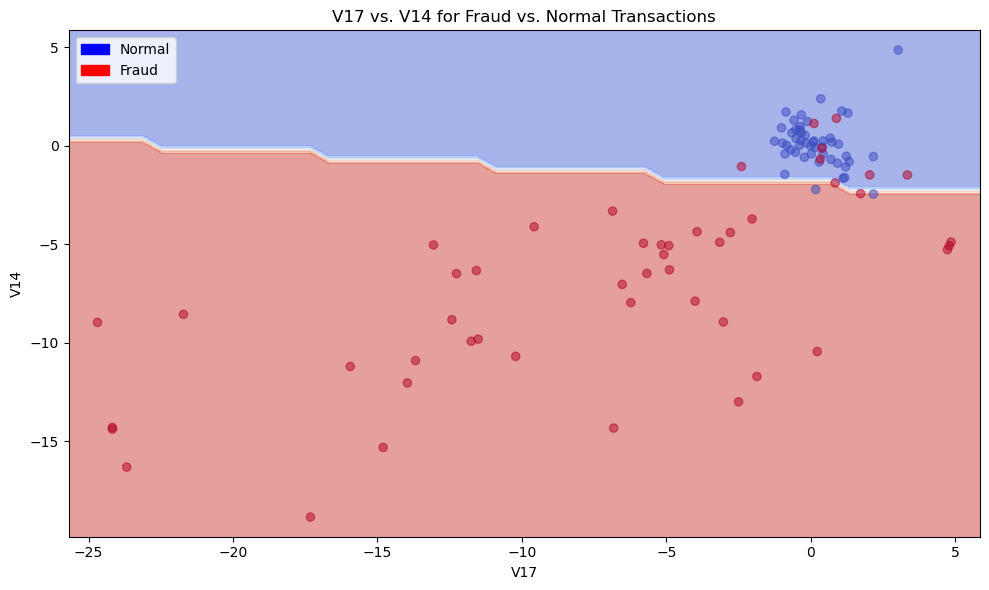

In [46]:
X = df_scaled[['V17', 'V14']]
y = df_scaled['Class']
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
# Predictions on grid points 
x_min, x_max = X_resampled['V17'].min() - 1, X_resampled['V17'].max() + 1
y_min, y_max = X_resampled['V14'].min() - 1, X_resampled['V14'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
# Predict on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap="coolwarm")

# Plot the original data points
plt.scatter(X_resampled['V17'], X_resampled['V14'], c=y_resampled, cmap="coolwarm", alpha=0.5)
plt.title("V17 vs. V14 for Fraud vs. Normal Transactions")
plt.legend(handles=[mpatches.Patch(color='blue', label='Normal'),
                    mpatches.Patch(color='red', label='Fraud')])
plt.xlabel('V17')
plt.ylabel('V14')
plt.tight_layout()
plt.savefig('V17_V14_LogReg.png', dpi=300)
plt.show()

Below we compare the performance of using features V17 and V14 against all features for two models: Logistic Regression with SMOTE and Logistic Regression with undersampling. Notice the difference in ROC curves when using all vs. the two features.


### Sampler: SMOTE ###

=== Model: Logistic Regression ===
Selected features: ['V17', 'V14']
Selected features: ['V17', 'V14']

=== Model: Logistic Regression ===
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

### Sampler: RandomUnderSampler ###

=== Model: Logistic Regression ===
Selected features: ['V17', 'V14']
Selected features: ['V17', 'V14']

=== Model: Logistic Regression ===
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', '

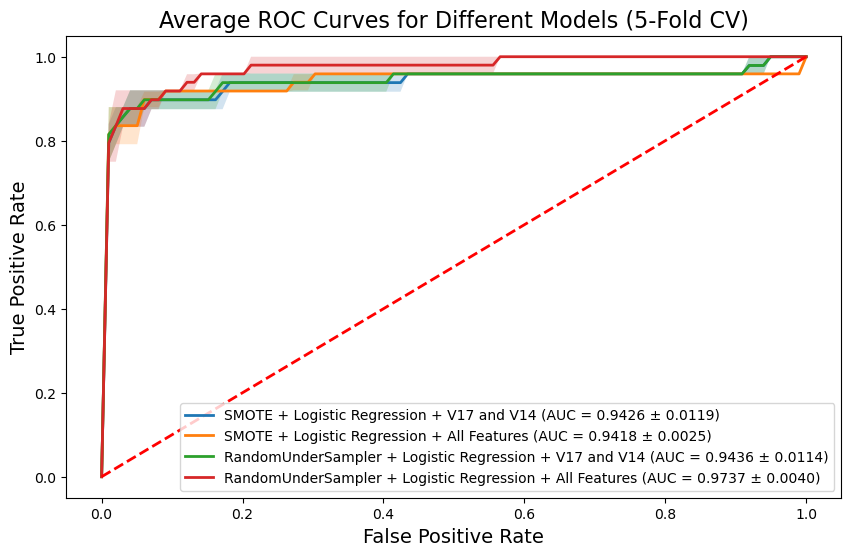

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Features and target
X = df_scaled.drop(columns=['Class'], axis=1)
#X = df_scaled[['V17', 'V14']]
y = df_scaled['Class']
feature_names = X.columns  # Store feature names for later reference
num_features = ['V17 and V14', 'All Features']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    #"RandomOverSampler": RandomOverSampler(sampling_strategy=1, random_state=42),
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    #"ADASYN": ADASYN(sampling_strategy=1, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
    # "NearMiss": NearMiss(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    #"Support Vector Machine": SVC(kernel="linear", probability=True),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for i in range(2):
        if i == 0:
            X = df_scaled[['V17', 'V14']]
        else: 
            X = df_scaled.drop(columns=['Class'], axis=1)
        for model_name, model in models.items():
            print(f"\n=== Model: {model_name} ===")

            tprs = []
            aucs = []
            mean_fpr = np.linspace(0, 1, 100)

            # Build the pipeline
            pipeline = Pipeline([
                ('sampler', sampler),
                #('feature_selection', RFE(estimator=model, n_features_to_select=5)),
                ('model', model)
            ])

            for train_idx, test_idx in skf.split(X, y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                # Fit pipeline
                pipeline.fit(X_train, y_train)

                # Feature selection mask
                #selected_mask = pipeline.named_steps['feature_selection'].support_
                #selected_features = feature_names[selected_mask]
                selected_features = X.columns
                print("Selected features:", list(selected_features))

                # Predict probabilities
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                # ROC and AUC
                fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
                roc_auc = auc(fpr, tpr)

                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(roc_auc)

            # Calculate mean + std AUC
            mean_tpr = np.mean(tprs, axis=0)
            std_tpr = np.std(tprs, axis=0)
            mean_auc = np.mean(aucs)
            std_auc = np.std(aucs)

            # Plot
            label = f"{sampler_name} + {model_name} + {num_features[i]} (AUC = {mean_auc:.4f} ± {std_auc:.4f})"
            plt.plot(mean_fpr, mean_tpr, lw=2, label=label)
            plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'r--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Average ROC Curves for Different Models (5-Fold CV)', fontsize=16)
plt.legend(loc="lower right")

# Show plot
plt.show()

Precision-recall curves have two benefits. First, it is easier to compare performances between models. Second, precision is an important metric not included in roc curves. Moreover, we care about important because we want the TP/(TP + FN) to be high. In the context of a fraud detection system, if on one hand precision is low, then fraud investigators will be waste time on false alarms. On the other hand, if precision is high, then fraud investigators will have high confidence in pursuing a fraud case.


### Sampler: SMOTE ###

=== Model: Log. Reg. ===

=== Model: Ran. For. ===

=== Model: Log. Reg. ===

=== Model: Ran. For. ===

### Sampler: USampler ###

=== Model: Log. Reg. ===

=== Model: Ran. For. ===

=== Model: Log. Reg. ===

=== Model: Ran. For. ===


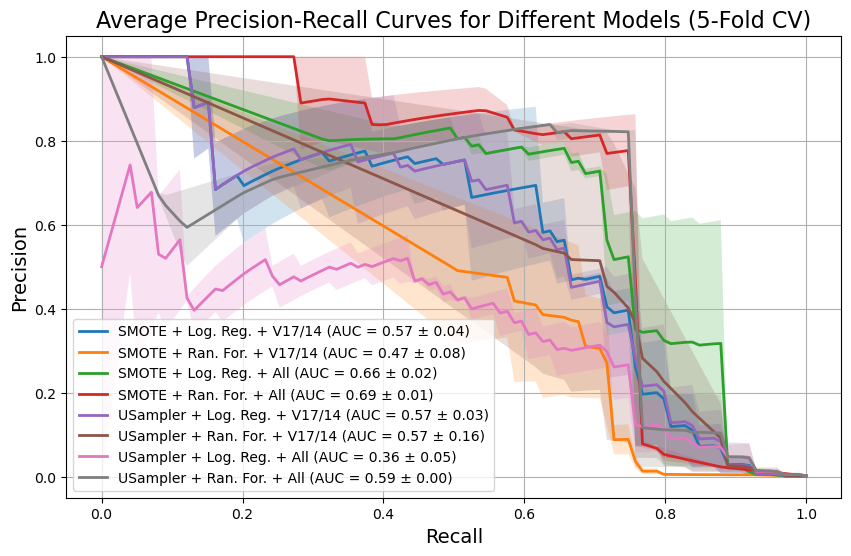

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Features and target
X = df_scaled.drop(columns=['Class'], axis=1)
y = df_scaled['Class']
feature_names = X.columns
num_features = ['V17/14', 'All']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    "USampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    "Log. Reg.": LogisticRegression(),
    "Ran. For.": RandomForestClassifier(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for i in range(2):
        if i == 0:
            X = df_scaled[['V17', 'V14']]
        else: 
            X = df_scaled.drop(columns=['Class'], axis=1)

        for model_name, model in models.items():
            print(f"\n=== Model: {model_name} ===")

            precisions = []
            recalls = []
            pr_aucs = []
            mean_recall = np.linspace(0, 1, 100)

            # Build pipeline
            pipeline = Pipeline([
                ('sampler', sampler),
                ('model', model)
            ])

            for train_idx, test_idx in skf.split(X, y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                pipeline.fit(X_train, y_train)
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
                pr_auc = auc(recall, precision)

                # Interpolate precision to align recall
                interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
                precisions.append(interp_precision)
                pr_aucs.append(pr_auc)

            # Mean and std
            mean_precision = np.mean(precisions, axis=0)
            std_precision = np.std(precisions, axis=0)
            mean_auc = np.mean(pr_aucs)
            std_auc = np.std(pr_aucs)

            label = f"{sampler_name} + {model_name} + {num_features[i]} (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
            plt.plot(mean_recall, mean_precision, lw=2, label=label)
            plt.fill_between(mean_recall, mean_precision - std_precision, mean_precision + std_precision, alpha=0.2)

# Plot formatting
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Average Precision-Recall Curves for Different Models (5-Fold CV)', fontsize=16)
# Make legend smaller
plt.legend(loc="lower left", fontsize=8)
# Add legend with custom size
plt.legend(loc="lower left")

plt.grid(True)
plt.show()


## 1. Correlation Matrices
Looking at the last row of the 2nd correlation matrix, we find the correlations between the features and the target class. We can use this for feature selection. As one can see from the first matrix, the correlations are not useful with the original imbalanced dataset; however, after undersampling we can more easily see which features have more influence over classification.

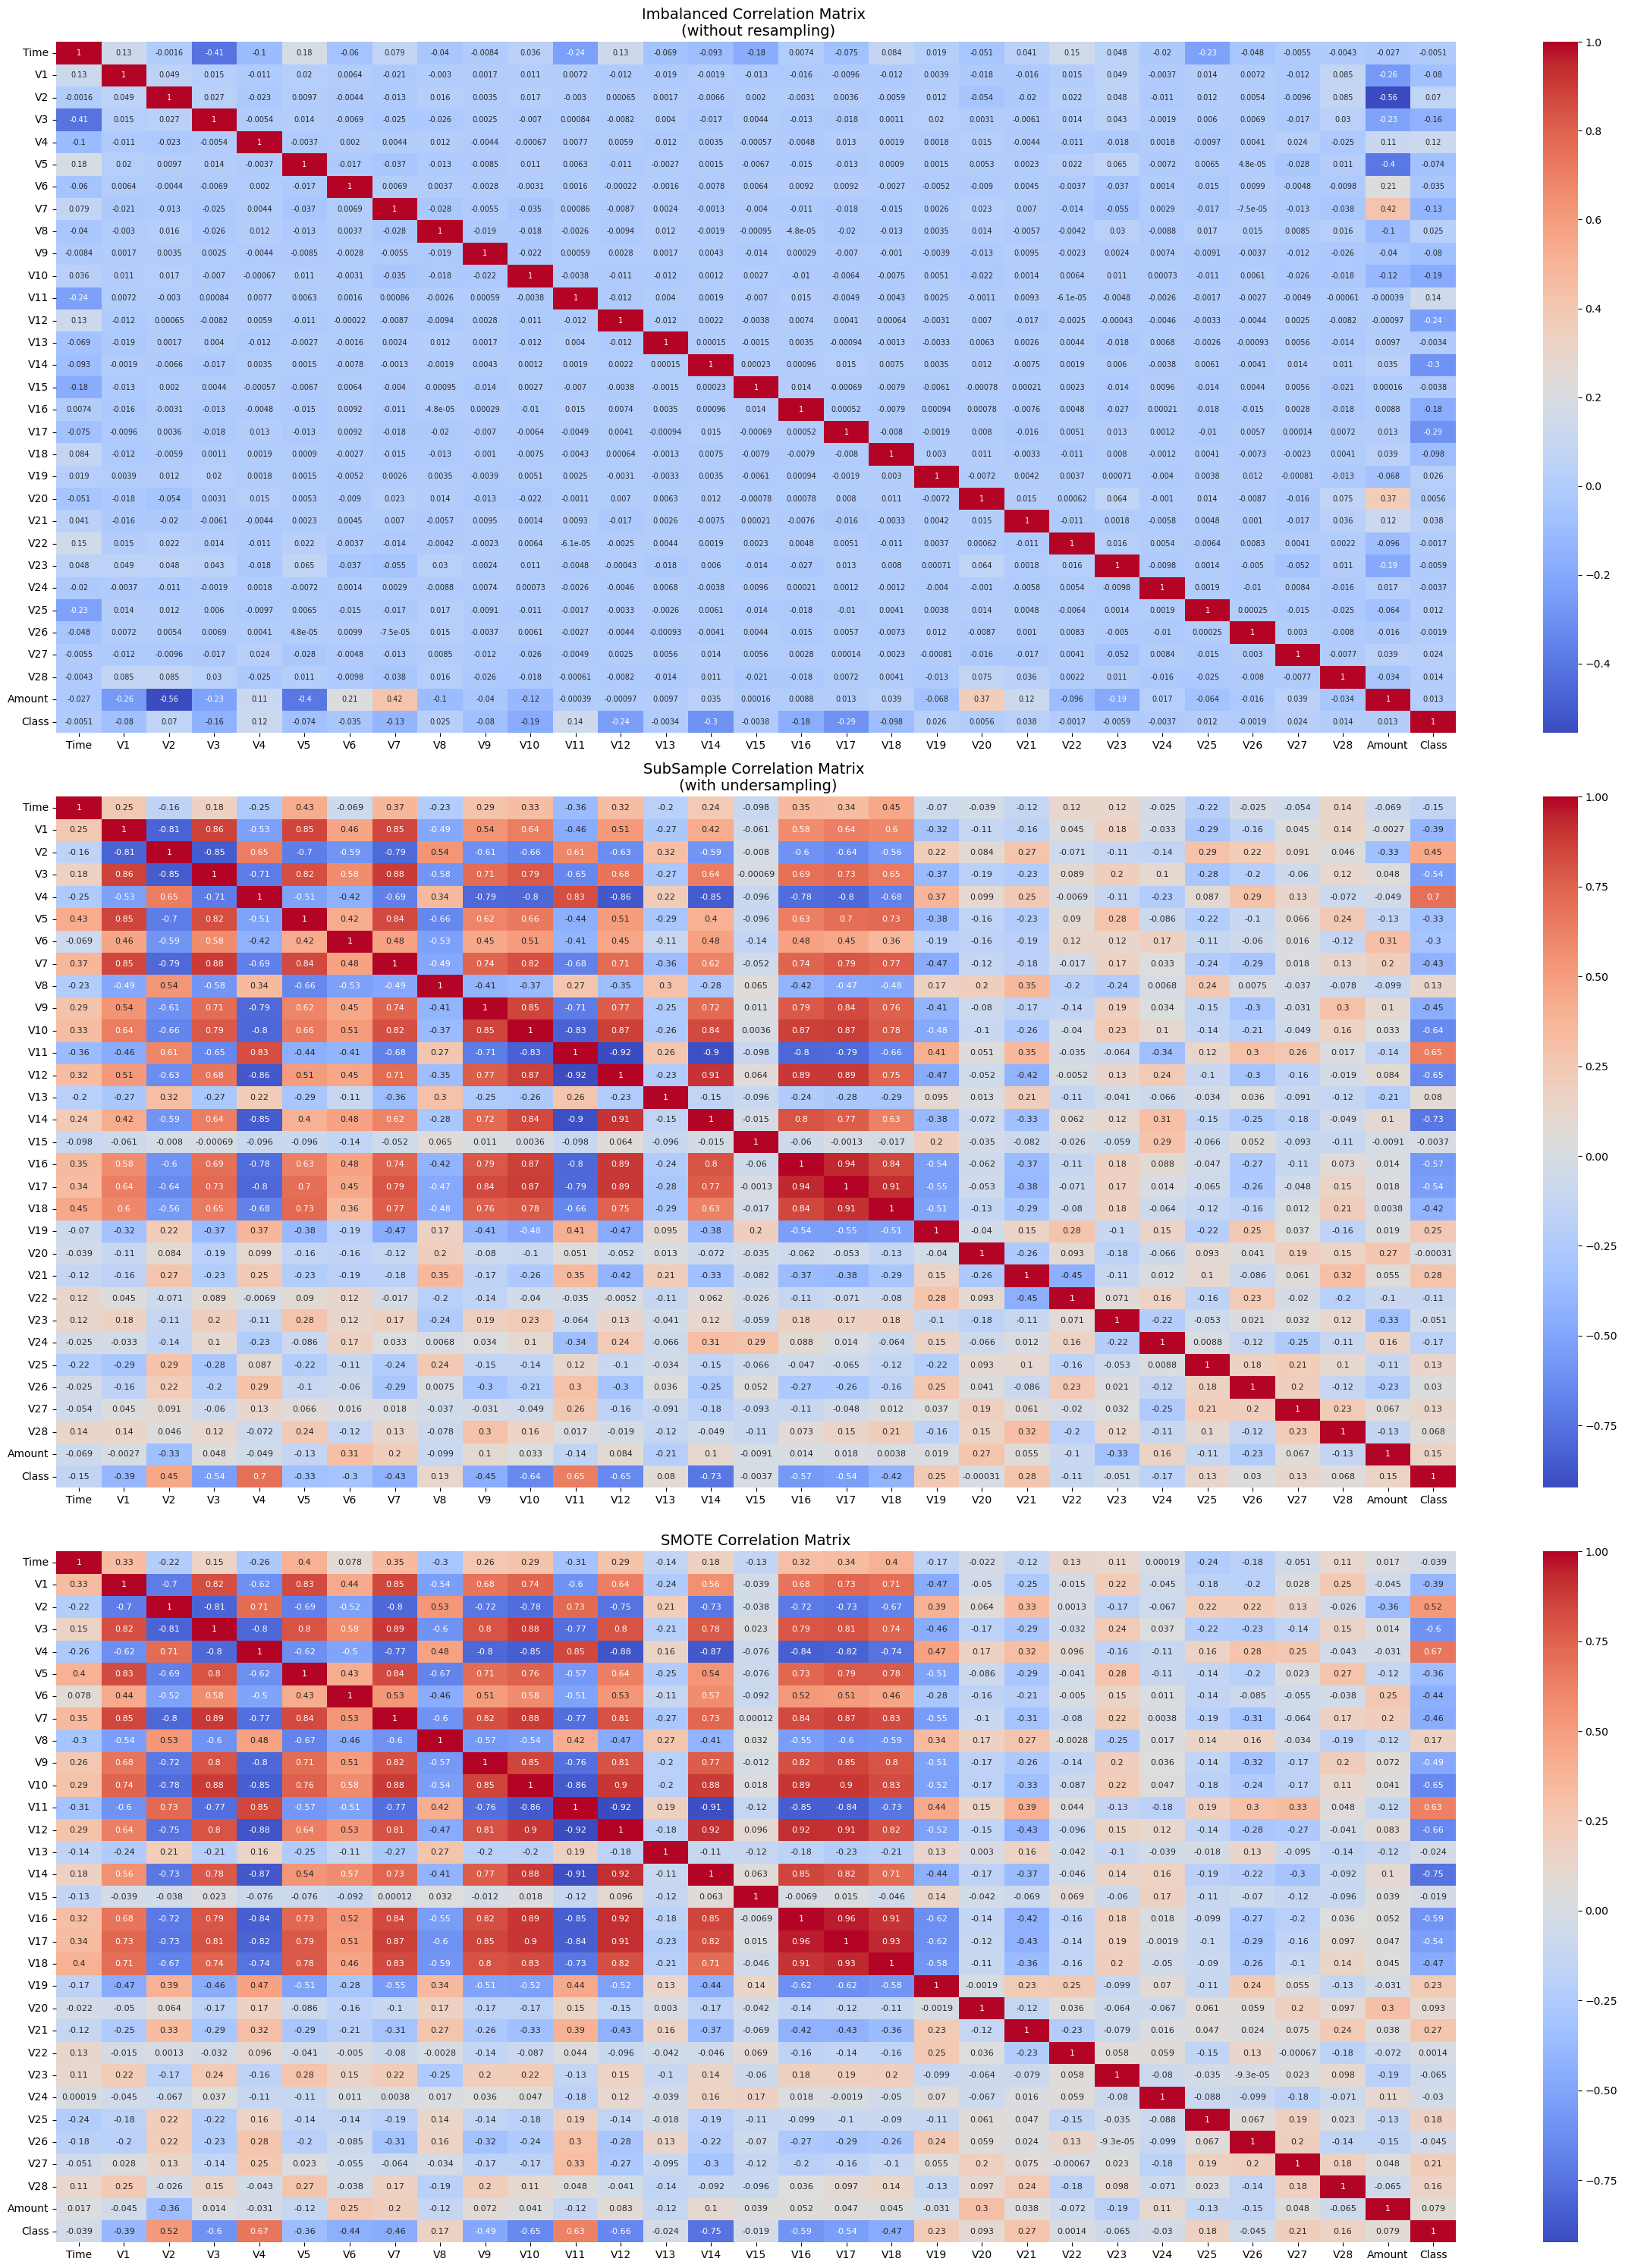

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(24,30))

cmap = 'coolwarm'

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap=cmap, annot=True, annot_kws={'size':7}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (without resampling)", fontsize=14)

# Subsampled DataFrame
# Downsample the majority class
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
X_resampled, y_resampled = rus.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['Class'] = y_resampled

sub_sample_corr = df_resampled.corr()
sns.heatmap(sub_sample_corr, cmap=cmap, annot=True, annot_kws={'size':8}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (with undersampling)', fontsize=14)

# Initialize SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)

# Separate features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recreate DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['Class'] = y_resampled
smote_sample_corr = df_resampled.corr()
sns.heatmap(smote_sample_corr, cmap=cmap, annot=True, annot_kws={'size':8}, ax=ax3)
ax3.set_title('SMOTE Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.show()

Below we plot the absolute correlations with the target variable in descending order

Text(0.5, 1.0, 'Absolute Correlation with Class')

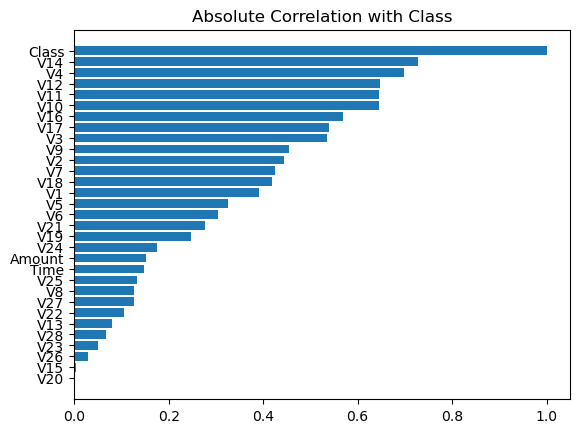

In [16]:
scores = sub_sample_corr.iloc[-1].abs().sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Absolute Correlation with Class")

## 2. Mutual Information
https://www.kaggle.com/code/ryanholbrook/mutual-information

Mutual information score of a feature is another measure of how strongly associated a feature is with the target. However, this does not account for interactions between features. Nonetheless, this can be used as a method of feature selection.

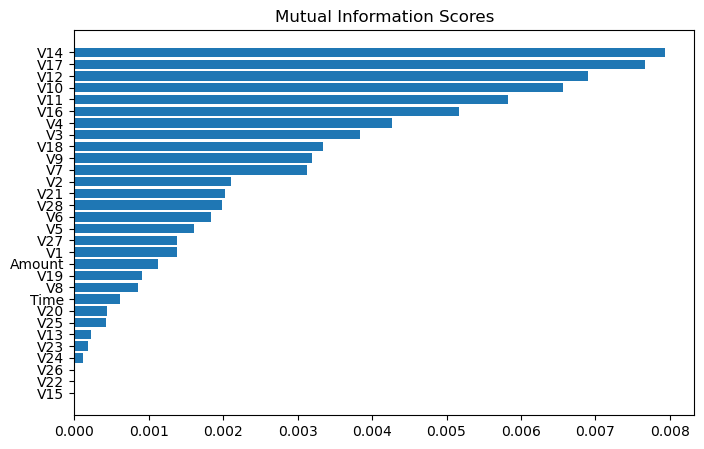

In [17]:
from sklearn.feature_selection import mutual_info_classif 

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Calculate MI scores
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']
discrete_features = False
mi_scores = make_mi_scores(X, y, discrete_features)
# Plot MI scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.show()
#'V4', 'V10', 'V11', 'V12', 'V14'

### Visually compare distributions of features between fraud vs normal transactions
We notice the difference in distributions between fraudulent and normal transactions. The subplots ordered by MI scores in descending order from left to right and from top to bottom. As one goes in descending order of MI scores, we see that the distributions of the two classes are more and more similar.

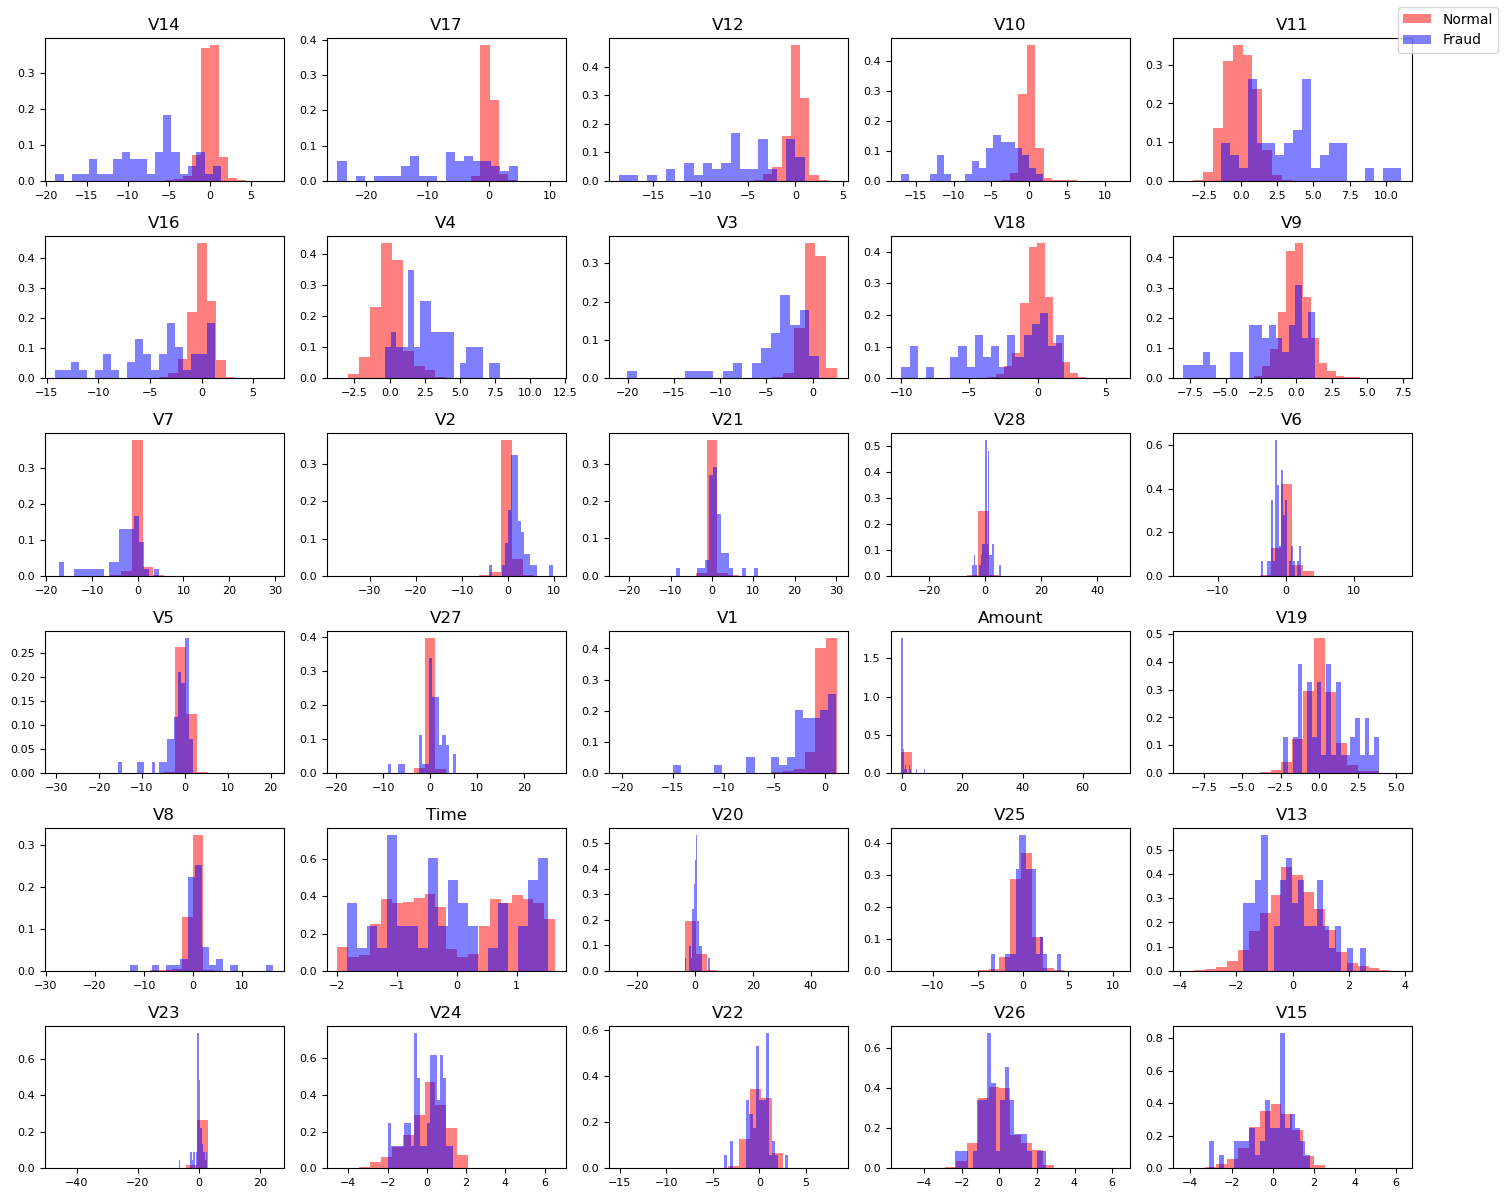

In [18]:
import matplotlib.pyplot as plt
fraud = df_scaled[df_scaled['Class'] == 1] 
normal = df_scaled[df_scaled['Class'] == 0]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust size as needed

# Loop over the features
for i in range(6):
    for j in range(5):
        idx = 5 * i + j
        if idx >= 30:
            axes[i, j].axis('off')  # Turn off unused subplots if any
            continue
        # Plot normalized histograms for each class
        idx2 = df.columns.get_loc(mi_scores.index[idx])
        axes[i, j].hist(normal.iloc[:, idx2], bins=20, alpha=0.5, color='red', label='Normal', density=True)
        axes[i, j].hist(fraud.iloc[:, idx2], bins=20, alpha=0.5, color='blue', label='Fraud', density=True)
        axes[i, j].set_title(df.columns[idx2])
        axes[i, j].tick_params(labelsize=8)

# Add a single legend for the whole figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space on right for legend

# Show the plot
plt.show()

Similar comparison is done below but with boxplots. There are minimal outliers in boxplots over fraud cases whereas outliers in normal transactions are abundant.

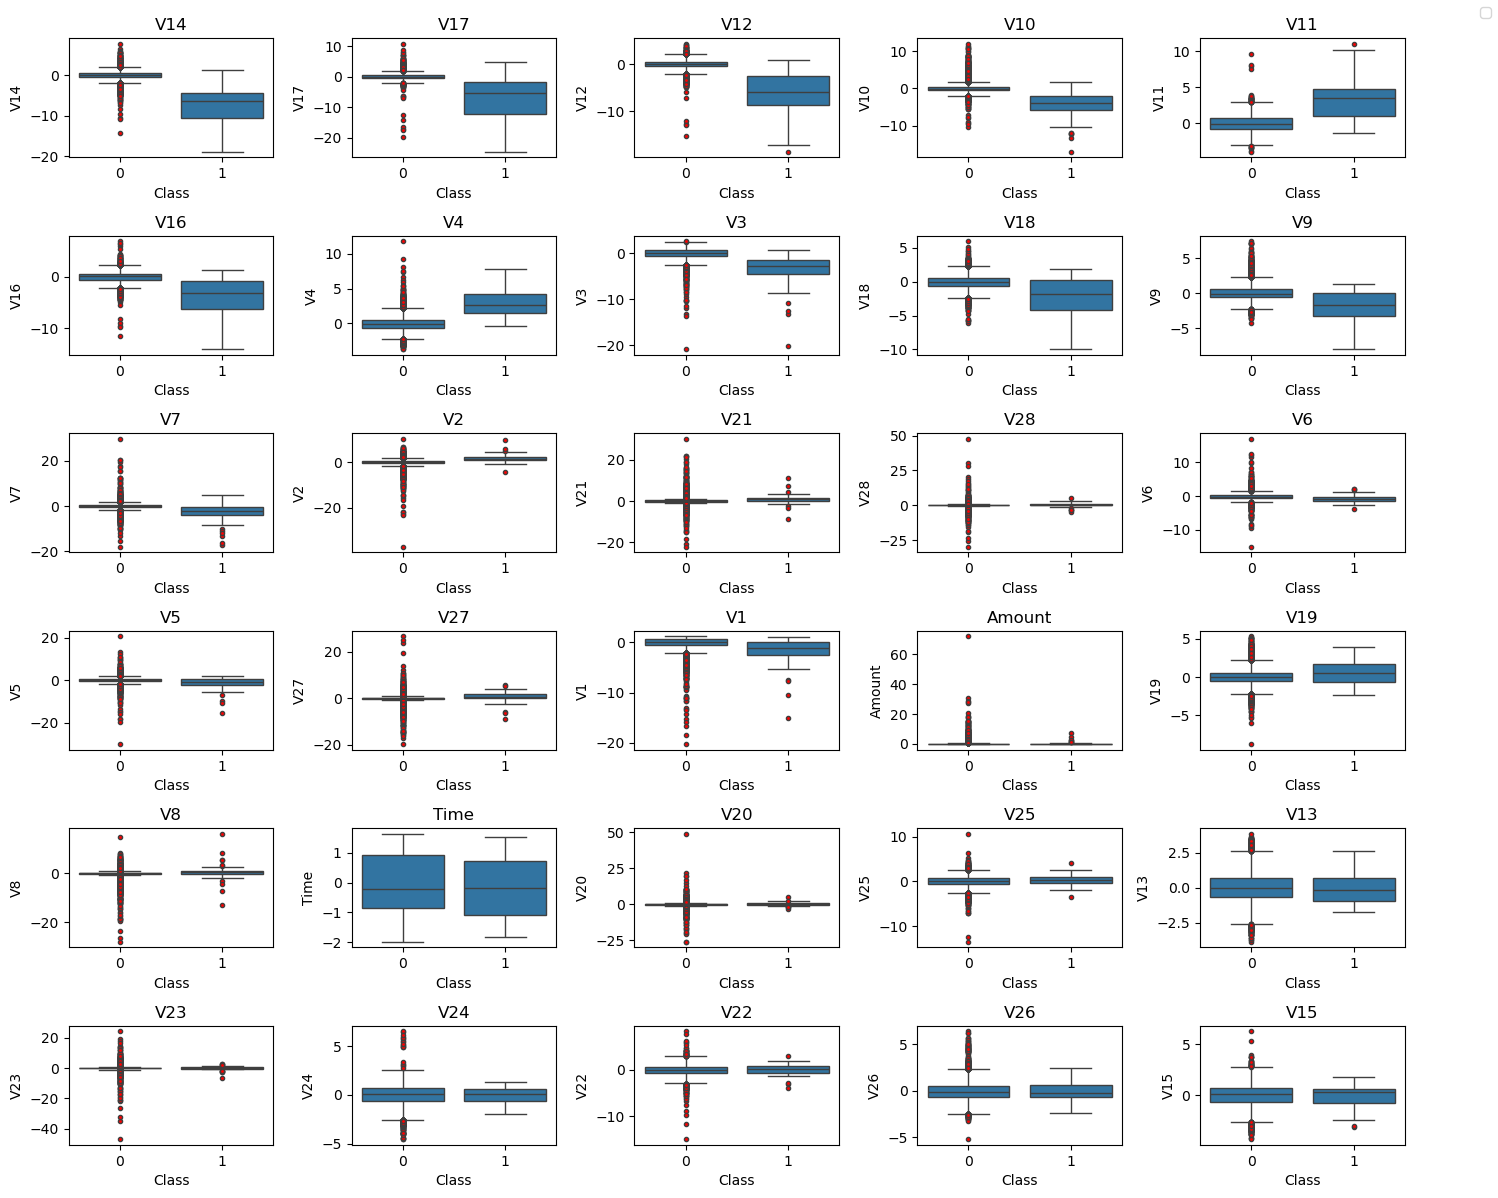

In [19]:
fraud = df_scaled[df_scaled['Class'] == 1] 
normal = df_scaled[df_scaled['Class'] == 0]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust size as needed

# Loop over the features
for i in range(6):
    for j in range(5):
        idx = 5 * i + j
        if idx >= 30:
            axes[i, j].axis('off')  # Turn off unused subplots if any
            continue
        # Plot normalized histograms for each class
        idx2 = df.columns.get_loc(mi_scores.index[idx])
        flierprops = dict(marker='o', markersize=3, markerfacecolor='red', linestyle='none')
        sns.boxplot(
            x="Class",
            y=mi_scores.index[idx],
            data=df_scaled,
            ax=axes[i, j],
            flierprops=flierprops
        )
        #sns.boxplot(x="Class", y=mi_scores.index[idx], data=df_scaled, ax=axes[i, j])
        axes[i, j].set_title(mi_scores.index[idx])

# Add a single legend for the whole figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space on right for legend

# Show the plot
plt.show()

## 3. Recursive Feature Elimination (RFE)
Alternatively, we can use RFECV to find the optimal number of features. With undersampling we get 16 while SMOTE gives only 2. The reason may be because with undersampling there is a loss of information so we require more features to compensate.

Sampler: SMOTE
Optimal number of features: 2
Sampler: RandomUnderSampler
Optimal number of features: 16


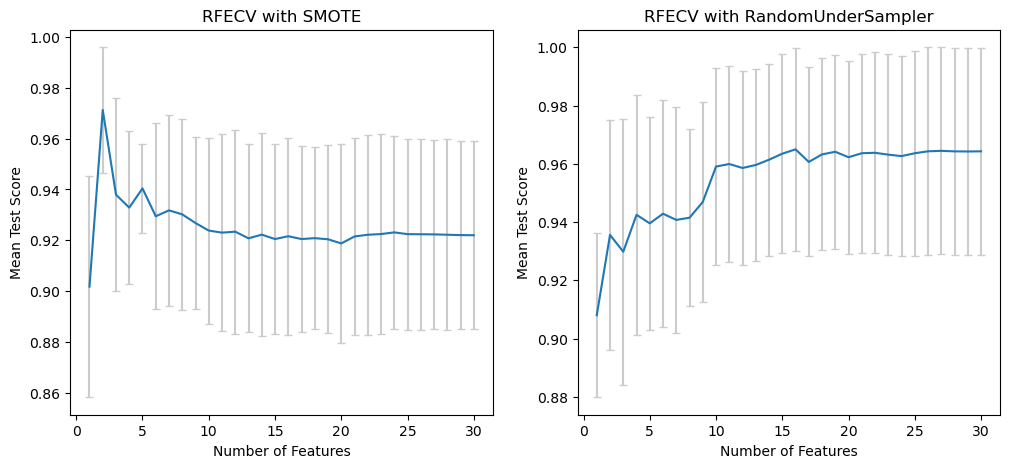

In [20]:
from sklearn.feature_selection import RFECV

# Features and labels
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']

# Classifier
#clf = LogisticRegression(solver='liblinear')  # 'liblinear' works well with small and imbalanced datasets
clf = LogisticRegression()

# Cross-validation strategy
cv = StratifiedKFold(5)

samplers = {
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Plot size
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    pipeline = Pipeline(steps=[
        ('sampler', sampler),
        ('clf', clf)
    ])
    # RFECV with sampler inside the pipeline
    rfecv = RFECV(
        estimator=pipeline,
        step=1,
        cv=cv,
        scoring='roc_auc',
        min_features_to_select=1,
        n_jobs=2,
        importance_getter=lambda est: est.named_steps['clf'].coef_
    )

    # Fit RFECV
    rfecv.fit(X, y)

    print(f"Sampler: {sampler_name}")
    print(f"Optimal number of features: {rfecv.n_features_}")

    # Plot RFECV results
    if sampler_name == "SMOTE":
        cv_results = pd.DataFrame(rfecv.cv_results_)
        axes[0].errorbar(
            x = cv_results['n_features'],
            y = cv_results['mean_test_score'],
            yerr = cv_results['std_test_score'],
            ecolor='0.8',
            capsize=3
        )
        axes[0].set_xlabel('Number of Features')
        axes[0].set_ylabel('Mean Test Score')
        axes[0].set_title('RFECV with SMOTE')
    else:
        cv_results = pd.DataFrame(rfecv.cv_results_)
        axes[1].errorbar(
            x = cv_results['n_features'],
            y = cv_results['mean_test_score'],
            yerr = cv_results['std_test_score'],
            ecolor='0.8',
            capsize=3
        )
        axes[1].set_xlabel('Number of Features')
        axes[1].set_ylabel('Mean Test Score')
        axes[1].set_title(f'RFECV with RandomUnderSampler')

## Model Training
We train models using a feature selection method (based on correlation with target class, MI scores, or RFE), a sampling method, and a model (logistic regression, random forest, etc.). We then evaluate models based on auc-roc scores and check for overfitting with learning curves.

Try RFE + SMOTE + rand forest


### Sampler: SMOTE ###

=== Model: Ran. For. ===
Get values of y_train: Class
0    14216
1       24
Name: count, dtype: int64
Selected 29 features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Get values of y_train: Class
0    14216
1       25
Name: count, dtype: int64
Selected 10 features: ['V3', 'V4', 'V8', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Amount']


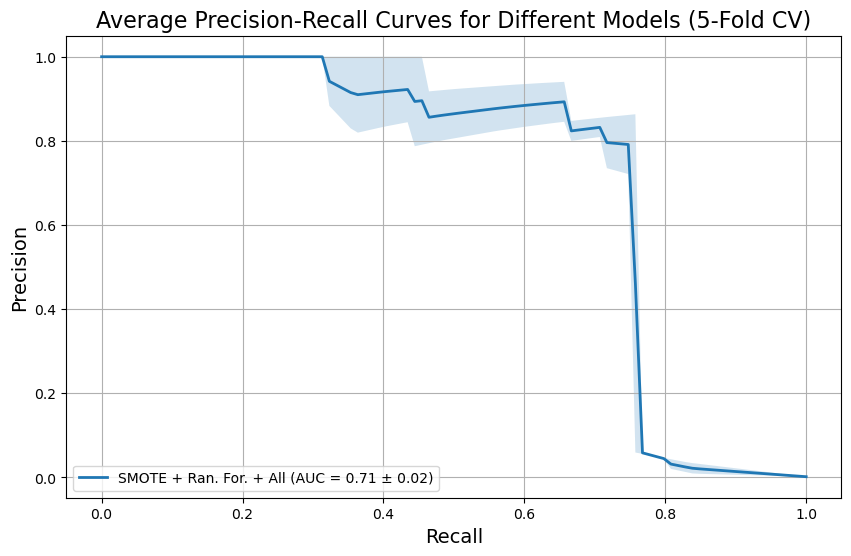

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Features and target
X = df_scaled.drop(columns=['Class'], axis=1)
y = df_scaled['Class']
feature_names = X.columns
num_features = ['V17/14', 'All']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    #"USampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    #"Log. Reg.": LogisticRegression(),
    "Ran. For.": RandomForestClassifier(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"\n=== Model: {model_name} ===")

        precisions = []
        recalls = []
        pr_aucs = []
        mean_recall = np.linspace(0, 1, 100)

        # Build pipeline
        pipeline = Pipeline([
            ('sampler', sampler),
            ('feature_selection', RFECV(
                estimator=model,
                step=1,
                cv=StratifiedKFold(2),
                scoring='average_precision',
                n_jobs=-1
            )),
            ('model', model)
        ])
        """
        pipeline = Pipeline([
            ('sampler', sampler),
            ('feature_selection', RFE(estimator=model, n_features_to_select=5)),
            ('model', model)
        ])
        """

        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            print(f"Get values of y_train: {y_train.value_counts()}")

            pipeline.fit(X_train, y_train)

            # Get selected features
            rfe = pipeline.named_steps['feature_selection']
            selected_features = X.columns[rfe.support_]
            print(f"Selected {len(selected_features)} features: {list(selected_features)}")

            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

            precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
            pr_auc = auc(recall, precision)

            # Interpolate precision to align recall
            interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
            precisions.append(interp_precision)
            pr_aucs.append(pr_auc)

        # Mean and std
        mean_precision = np.mean(precisions, axis=0)
        std_precision = np.std(precisions, axis=0)
        mean_auc = np.mean(pr_aucs)
        std_auc = np.std(pr_aucs)

        label = f"{sampler_name} + {model_name} + {num_features[i]} (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
        plt.plot(mean_recall, mean_precision, lw=2, label=label)
        plt.fill_between(mean_recall, mean_precision - std_precision, mean_precision + std_precision, alpha=0.2)

# Plot formatting
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Average Precision-Recall Curves for Different Models (5-Fold CV)', fontsize=16)
# Make legend smaller
plt.legend(loc="lower left", fontsize=8)
# Add legend with custom size
plt.legend(loc="lower left")

plt.grid(True)
plt.show()


Try RFE/SMOTE (with .05/.10/.15 ratios)/Ran. For. Reached highest AUC score of 0.76 with .15 SMOTE sampling ratio.

__Key Observation__: If you look at the PR curves below, you will notice as recall increases precision remains high and drops quickly around recall hitting near 0.8. In fact, so far as we have seen, for all PR curves as recall approaches 0.8 precision is significantly low. There might be a connection between this behavior and nature of clusters depicted in fraud_vs_normal_clusters.png from the t-sne visualization. A natural line of separation is drawn in the png file. Suppose a model uses this decision boundary and classifies points to the right of the line as fraud and the left as normal. Then precision (TP / (TP + FP)) is 1.0 since all points classified as fraud are indeed fraud and recall (TP / (TP + FN)) is around 0.8 since there are about 50 fraudulent points and 10 of them are on the left side and are false negatives. Now if we attempt to increase recall by collecting more red points by moving the line leftwards, we would unavoidably collect blue points and therefore decrease precision. This may be the reason why PR curves all drop around (if not before) the 0.8 mark. And so we may not be able to significantly improve the AUC score from 0.76.


### Sampler: SMOTE .05 ###

=== Model: Ran. For. ===
Get values of y_train: Class
0    14216
1       24
Name: count, dtype: int64
Selected 22 features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V20', 'V21', 'V26', 'V27', 'V28', 'Amount']
Get values of y_train: Class
0    14216
1       25
Name: count, dtype: int64
Selected 26 features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V23', 'V25', 'V26', 'V27', 'V28', 'Amount']

### Sampler: SMOTE .1 ###

=== Model: Ran. For. ===
Get values of y_train: Class
0    14216
1       24
Name: count, dtype: int64
Selected 14 features: ['V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V26', 'V27', 'Amount']
Get values of y_train: Class
0    14216
1       25
Name: count, dtype: int64
Selected 28 features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'

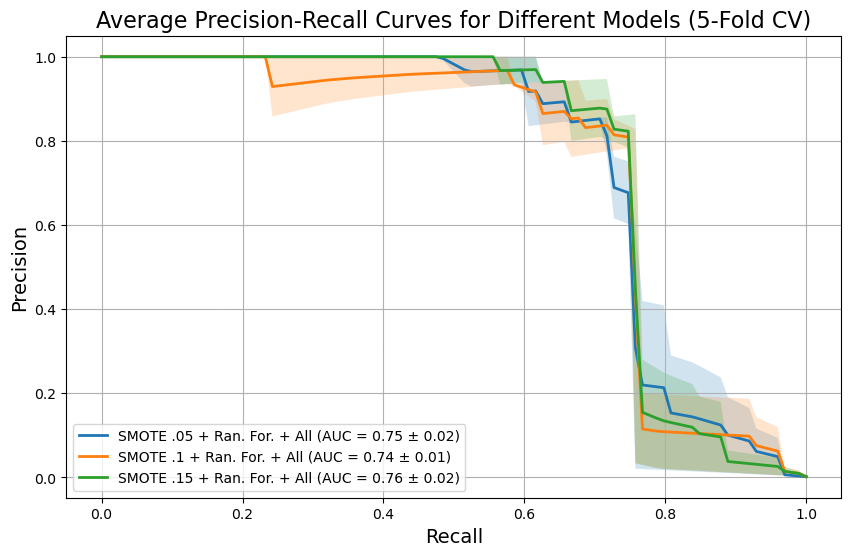

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Features and target
X = df_scaled.drop(columns=['Class'], axis=1)
y = df_scaled['Class']
feature_names = X.columns
num_features = ['V17/14', 'All']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    "SMOTE .05": SMOTE(sampling_strategy=0.05, random_state=42),
    "SMOTE .1": SMOTE(sampling_strategy=0.1, random_state=42),
    "SMOTE .15": SMOTE(sampling_strategy=0.15, random_state=42),
    #"USampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    #"Log. Reg.": LogisticRegression(),
    "Ran. For.": RandomForestClassifier(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"\n=== Model: {model_name} ===")

        precisions = []
        recalls = []
        pr_aucs = []
        mean_recall = np.linspace(0, 1, 100)

        # Build pipeline
        pipeline = Pipeline([
            ('sampler', sampler),
            ('feature_selection', RFECV(
                estimator=model,
                step=1,
                cv=StratifiedKFold(2),
                scoring='average_precision',
                n_jobs=-1
            )),
            ('model', model)
        ])
        """
        pipeline = Pipeline([
            ('sampler', sampler),
            ('feature_selection', RFE(estimator=model, n_features_to_select=5)),
            ('model', model)
        ])
        """

        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            print(f"Get values of y_train: {y_train.value_counts()}")

            pipeline.fit(X_train, y_train)

            # Get selected features
            rfe = pipeline.named_steps['feature_selection']
            selected_features = X.columns[rfe.support_]
            print(f"Selected {len(selected_features)} features: {list(selected_features)}")

            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

            precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
            pr_auc = auc(recall, precision)

            # Interpolate precision to align recall
            interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
            precisions.append(interp_precision)
            pr_aucs.append(pr_auc)

        # Mean and std
        mean_precision = np.mean(precisions, axis=0)
        std_precision = np.std(precisions, axis=0)
        mean_auc = np.mean(pr_aucs)
        std_auc = np.std(pr_aucs)

        label = f"{sampler_name} + {model_name} + {num_features[i]} (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
        plt.plot(mean_recall, mean_precision, lw=2, label=label)
        plt.fill_between(mean_recall, mean_precision - std_precision, mean_precision + std_precision, alpha=0.2)

# Plot formatting
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Average Precision-Recall Curves for Different Models (5-Fold CV)', fontsize=16)
# Make legend smaller
plt.legend(loc="lower left", fontsize=8)
# Add legend with custom size
plt.legend(loc="lower left")

plt.grid(True)
plt.tight_layout()

plt.show()


10/12/14 number of features


### Sampler: SMOTE ###

=== Model: Ran. For. ===


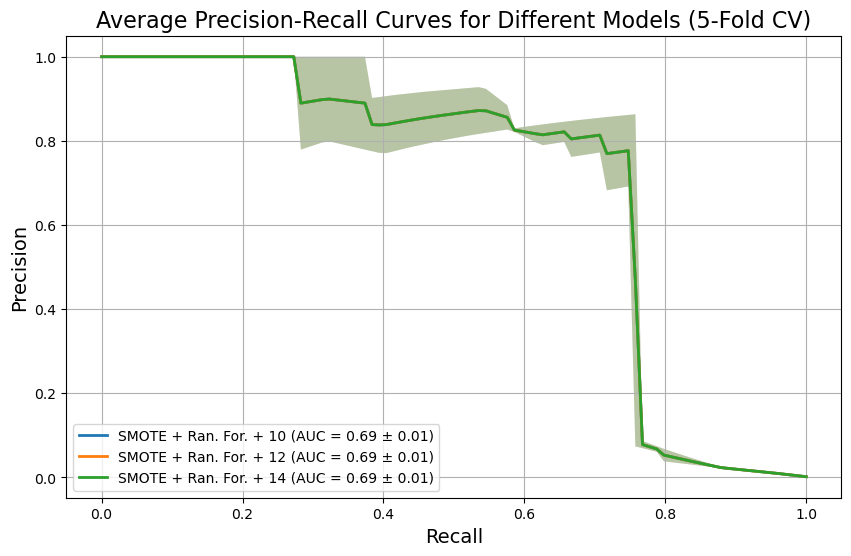

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Features and target
X = df_scaled.drop(columns=['Class'], axis=1)
y = df_scaled['Class']
feature_names = X.columns
num_features = ['V17/14', 'All']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    #"USampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    #"Log. Reg.": LogisticRegression(),
    "Ran. For.": RandomForestClassifier(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"\n=== Model: {model_name} ===")
        for i in range(3):
            
            precisions = []
            recalls = []
            pr_aucs = []
            mean_recall = np.linspace(0, 1, 100)

            # Build pipeline
            pipeline = Pipeline([
                ('sampler', sampler),
                ('model', model)
            ])
            
            for train_idx, test_idx in skf.split(X[list(mi_scores.index[0:10+2*i])], y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                pipeline.fit(X_train, y_train)
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
                pr_auc = auc(recall, precision)

                # Interpolate precision to align recall
                interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
                precisions.append(interp_precision)
                pr_aucs.append(pr_auc)

            # Mean and std
            mean_precision = np.mean(precisions, axis=0)
            std_precision = np.std(precisions, axis=0)
            mean_auc = np.mean(pr_aucs)
            std_auc = np.std(pr_aucs)

            label = f"{sampler_name} + {model_name} + {10+2*i} (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
            plt.plot(mean_recall, mean_precision, lw=2, label=label)
            plt.fill_between(mean_recall, mean_precision - std_precision, mean_precision + std_precision, alpha=0.2)

# Plot formatting
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Average Precision-Recall Curves for Different Models (5-Fold CV)', fontsize=16)
# Make legend smaller
plt.legend(loc="lower left", fontsize=8)
# Add legend with custom size
plt.legend(loc="lower left")

plt.grid(True)
plt.show()


16/18/20 number of features


### Sampler: SMOTE ###

=== Model: Ran. For. ===


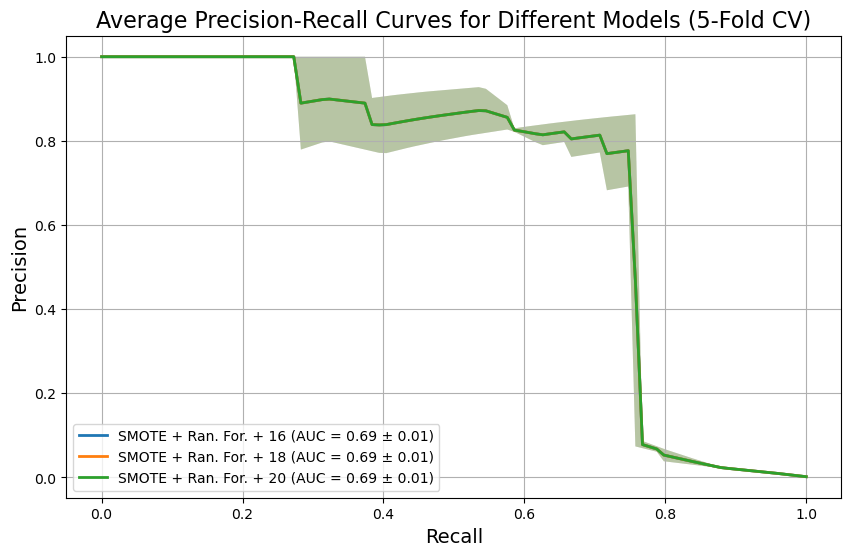

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Features and target
X = df_scaled.drop(columns=['Class'], axis=1)
y = df_scaled['Class']
feature_names = X.columns
num_features = ['V17/14', 'All']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    #"USampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    #"Log. Reg.": LogisticRegression(),
    "Ran. For.": RandomForestClassifier(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"\n=== Model: {model_name} ===")
        for i in range(3):
            
            precisions = []
            recalls = []
            pr_aucs = []
            mean_recall = np.linspace(0, 1, 100)

            # Build pipeline
            pipeline = Pipeline([
                ('sampler', sampler),
                ('model', model)
            ])
            
            for train_idx, test_idx in skf.split(X[list(mi_scores.index[0:16+2*i])], y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                pipeline.fit(X_train, y_train)
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
                pr_auc = auc(recall, precision)

                # Interpolate precision to align recall
                interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
                precisions.append(interp_precision)
                pr_aucs.append(pr_auc)

            # Mean and std
            mean_precision = np.mean(precisions, axis=0)
            std_precision = np.std(precisions, axis=0)
            mean_auc = np.mean(pr_aucs)
            std_auc = np.std(pr_aucs)

            label = f"{sampler_name} + {model_name} + {16+2*i} (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
            plt.plot(mean_recall, mean_precision, lw=2, label=label)
            plt.fill_between(mean_recall, mean_precision - std_precision, mean_precision + std_precision, alpha=0.2)

# Plot formatting
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Average Precision-Recall Curves for Different Models (5-Fold CV)', fontsize=16)
# Make legend smaller
plt.legend(loc="lower left", fontsize=8)
# Add legend with custom size
plt.legend(loc="lower left")

plt.grid(True)
plt.show()


Tried with adding 'Amount' Feature


### Sampler: SMOTE ###

=== Model: Ran. For. ===


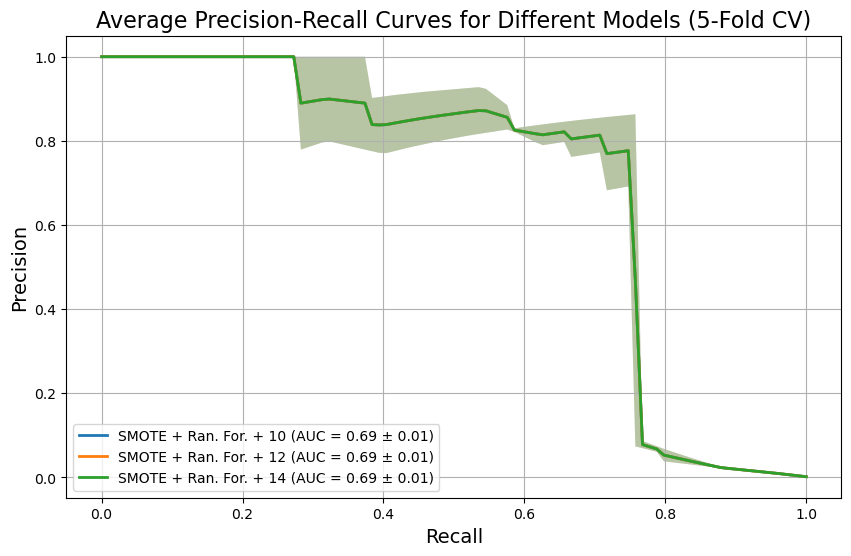

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Features and target
X = df_scaled.drop(columns=['Class'], axis=1)
y = df_scaled['Class']
feature_names = X.columns
num_features = ['V17/14', 'All']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    #"USampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    #"Log. Reg.": LogisticRegression(),
    "Ran. For.": RandomForestClassifier(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"\n=== Model: {model_name} ===")
        for i in range(3):
            
            precisions = []
            recalls = []
            pr_aucs = []
            mean_recall = np.linspace(0, 1, 100)

            # Build pipeline
            pipeline = Pipeline([
                ('sampler', sampler),
                ('model', model)
            ])
            
            for train_idx, test_idx in skf.split(X[['Amount']+list(mi_scores.index[0:10+2*i])], y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                pipeline.fit(X_train, y_train)
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
                pr_auc = auc(recall, precision)

                # Interpolate precision to align recall
                interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
                precisions.append(interp_precision)
                pr_aucs.append(pr_auc)

            # Mean and std
            mean_precision = np.mean(precisions, axis=0)
            std_precision = np.std(precisions, axis=0)
            mean_auc = np.mean(pr_aucs)
            std_auc = np.std(pr_aucs)

            label = f"{sampler_name} + {model_name} + {10+2*i} (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
            plt.plot(mean_recall, mean_precision, lw=2, label=label)
            plt.fill_between(mean_recall, mean_precision - std_precision, mean_precision + std_precision, alpha=0.2)

# Plot formatting
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Average Precision-Recall Curves for Different Models (5-Fold CV)', fontsize=16)
# Make legend smaller
plt.legend(loc="lower left", fontsize=8)
# Add legend with custom size
plt.legend(loc="lower left")

plt.grid(True)
plt.show()


Try test_features = ['V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V26', 'V27', 'Amount'] with sampling strategies = 1.00/0.15 and ensemble classifiers

test_features: ['V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V26', 'V27', 'Amount']

### Sampler: SMOTE 1 ###

=== Model: HistGB ===

=== Model: AdaBoost ===

### Sampler: SMOTE .15 ###

=== Model: HistGB ===

=== Model: AdaBoost ===


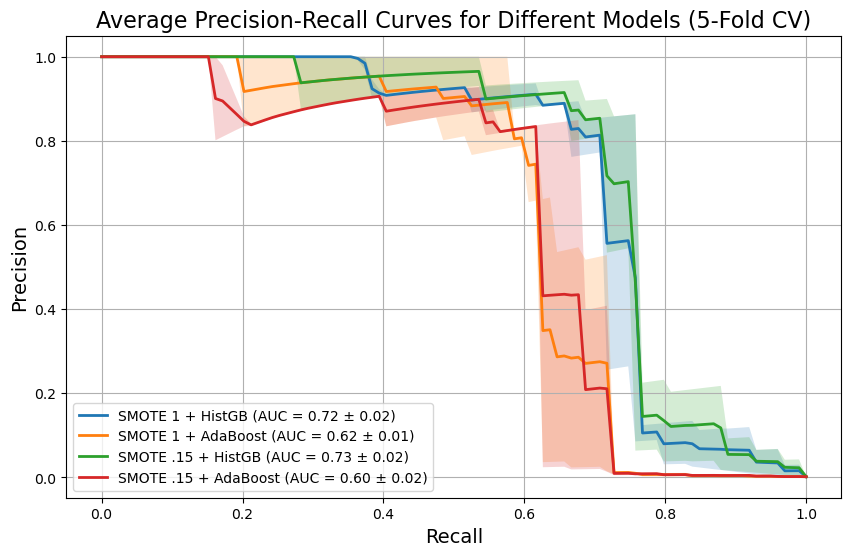

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Features and target
test_features = ['V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V26', 'V27', 'Amount']
print(f"test_features: {test_features}")
X = df_scaled.drop(columns=['Class'], axis=1)
y = df_scaled['Class']
feature_names = X.columns

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    "SMOTE 1": SMOTE(sampling_strategy=1, random_state=42),
    "SMOTE .15": SMOTE(sampling_strategy=0.15, random_state=42),
    #"USampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    #"Log. Reg.": LogisticRegression(),
    #"Ran. For.": RandomForestClassifier(random_state=42)
    "HistGB": HistGradientBoostingClassifier(random_state=42, early_stopping=True),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"\n=== Model: {model_name} ===")
        for i in range(1):
            
            precisions = []
            recalls = []
            pr_aucs = []
            mean_recall = np.linspace(0, 1, 100)

            # Build pipeline
            pipeline = Pipeline([
                ('sampler', sampler),
                ('model', model)
            ])
            
            for train_idx, test_idx in skf.split(X[test_features], y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                pipeline.fit(X_train, y_train)
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
                pr_auc = auc(recall, precision)

                # Interpolate precision to align recall
                interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
                precisions.append(interp_precision)
                pr_aucs.append(pr_auc)

            # Mean and std
            mean_precision = np.mean(precisions, axis=0)
            std_precision = np.std(precisions, axis=0)
            mean_auc = np.mean(pr_aucs)
            std_auc = np.std(pr_aucs)

            label = f"{sampler_name} + {model_name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
            plt.plot(mean_recall, mean_precision, lw=2, label=label)
            plt.fill_between(mean_recall, mean_precision - std_precision, mean_precision + std_precision, alpha=0.2)

# Plot formatting
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Average Precision-Recall Curves for Different Models (5-Fold CV)', fontsize=16)
# Make legend smaller
plt.legend(loc="lower left", fontsize=8)
# Add legend with custom size
plt.legend(loc="lower left")

plt.grid(True)
plt.show()


# Notice
All cells below this cell are messy, needs to be organized

In [6]:
# Load dataset
df = pd.read_csv("creditcard.csv")

# Preprocessing: Scale Amount and Time
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
print(len(df))
df.head()

284807


V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_amount  scaled_time  
0 -0.189115  0.133558 -0.021053      0       1.783274    -0.994983  
1  0.125895 -0.008983  0.014724      0      -0.269825    -0.994983  
2 -0.139097 -0.055353 -0.059752      0       4.983721    -0.994972  
3 -0.221929  0.062723  0.061458      0       1.418291    -0.994972  
4  0.502292  0.219422  0.215153      0       0.670579    -0.994960  

[5 rows x 31 columns]

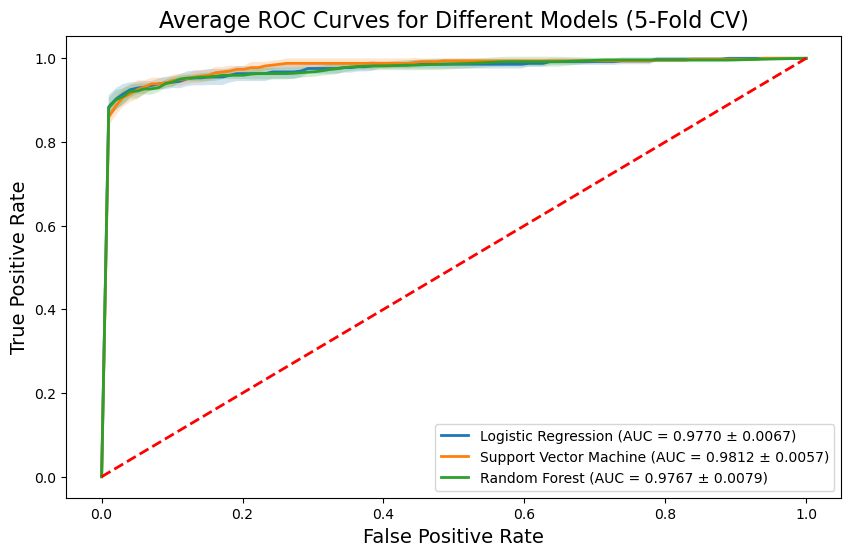

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through models
for model_name, model in models.items():
    # Store TPRs, AUCs, and mean FPR points
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)  # Common FPR points for interpolation

    # Initialize pipeline with undersampling
    pipeline = Pipeline([
        ('under_sampler', RandomUnderSampler(sampling_strategy=1, random_state=42)),
        #('feature_selection', RFE(estimator=model, n_features_to_select=10)),  # RFE stage
        ('model', model)
    ])

    # Perform 5-fold cross-validation
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train model
        pipeline.fit(X_train, y_train)

        # Get probability scores
        y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Interpolate TPR at common FPR points
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0  # Ensure (0,0) start point

        # Store values
        tprs.append(interp_tpr)
        aucs.append(roc_auc)

    # Compute mean and standard deviation for TPRs
    mean_tpr = np.mean(tprs, axis=0)
    std_tpr = np.std(tprs, axis=0)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    # Plot mean ROC curve for this model
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f"{model_name} (AUC = {mean_auc:.4f} ± {std_auc:.4f})")

    # Fill standard deviation area
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'r--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Average ROC Curves for Different Models (5-Fold CV)', fontsize=16)
plt.legend(loc="lower right")

# Show plot
plt.show()



=== Logistic Regression ===
Selected features: ['V4', 'V10', 'V12', 'V14', 'V28']
Selected features: ['V4', 'V10', 'V12', 'V14', 'V16']
Selected features: ['V4', 'V10', 'V12', 'V14', 'V22']
Selected features: ['V4', 'V10', 'V12', 'V14', 'V26']
Selected features: ['V4', 'V12', 'V14', 'V26', 'V27']

=== Support Vector Machine ===
Selected features: ['V4', 'V8', 'V12', 'V14', 'V28']
Selected features: ['V4', 'V10', 'V12', 'V14', 'V16']
Selected features: ['V4', 'V12', 'V14', 'V27', 'V28']
Selected features: ['V4', 'V10', 'V12', 'V14', 'V26']
Selected features: ['V4', 'V8', 'V12', 'V14', 'V26']

=== Random Forest ===
Selected features: ['V4', 'V10', 'V12', 'V14', 'V17']
Selected features: ['V4', 'V10', 'V11', 'V12', 'V14']
Selected features: ['V4', 'V10', 'V11', 'V12', 'V14']
Selected features: ['V4', 'V10', 'V11', 'V12', 'V14']
Selected features: ['V4', 'V10', 'V11', 'V12', 'V14']


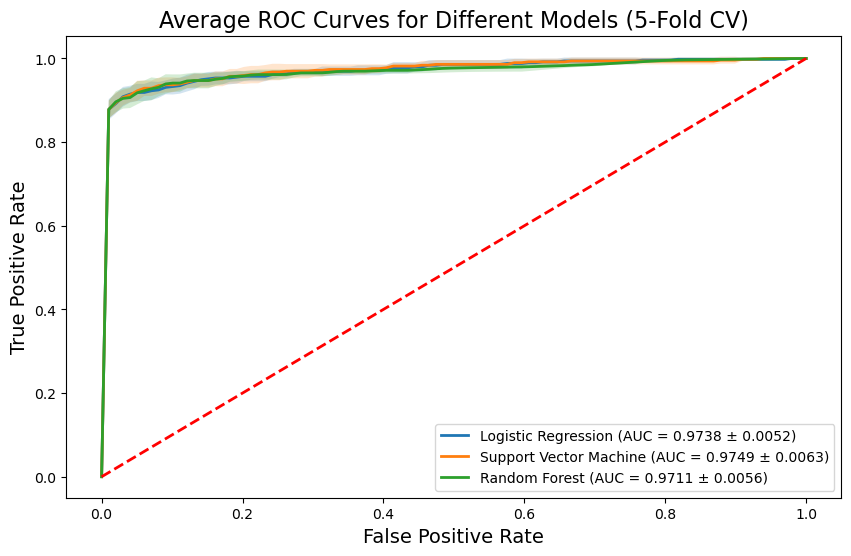

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']
feature_names = X.columns  # Store feature names for later reference

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through models
for model_name, model in models.items():
    print(f"\n=== {model_name} ===")
    
    # Store TPRs, AUCs, and mean FPR points
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)  # Common FPR points for interpolation

    # Initialize pipeline with undersampling and RFE
    pipeline = Pipeline([
        ('under_sampler', RandomUnderSampler(sampling_strategy=1, random_state=42)),
        ('feature_selection', RFE(estimator=model, n_features_to_select=5)),  # RFE stage
        ('model', model)
    ])

    # Perform 5-fold cross-validation
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train model
        pipeline.fit(X_train, y_train)

        # Print selected features
        selected_mask = pipeline.named_steps['feature_selection'].support_  # Boolean mask of selected features
        selected_features = feature_names[selected_mask]
        print("Selected features:", list(selected_features))

        # Get probability scores
        y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Interpolate TPR at common FPR points
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0  # Ensure (0,0) start point

        # Store values
        tprs.append(interp_tpr)
        aucs.append(roc_auc)

    # Compute mean and standard deviation for TPRs
    mean_tpr = np.mean(tprs, axis=0)
    std_tpr = np.std(tprs, axis=0)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    # Plot mean ROC curve for this model
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f"{model_name} (AUC = {mean_auc:.4f} ± {std_auc:.4f})")

    # Fill standard deviation area
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'r--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Average ROC Curves for Different Models (5-Fold CV)', fontsize=16)
plt.legend(loc="lower right")

# Show plot
plt.show()


## Sampling Methods, Models, Feature Selection with normalized data


### Sampler: SMOTE ###

=== Model: Logistic Regression ===
Selected features: ['V4', 'V10', 'V11', 'V12', 'V14']
Selected features: ['V4', 'V10', 'V12', 'V14', 'V26']


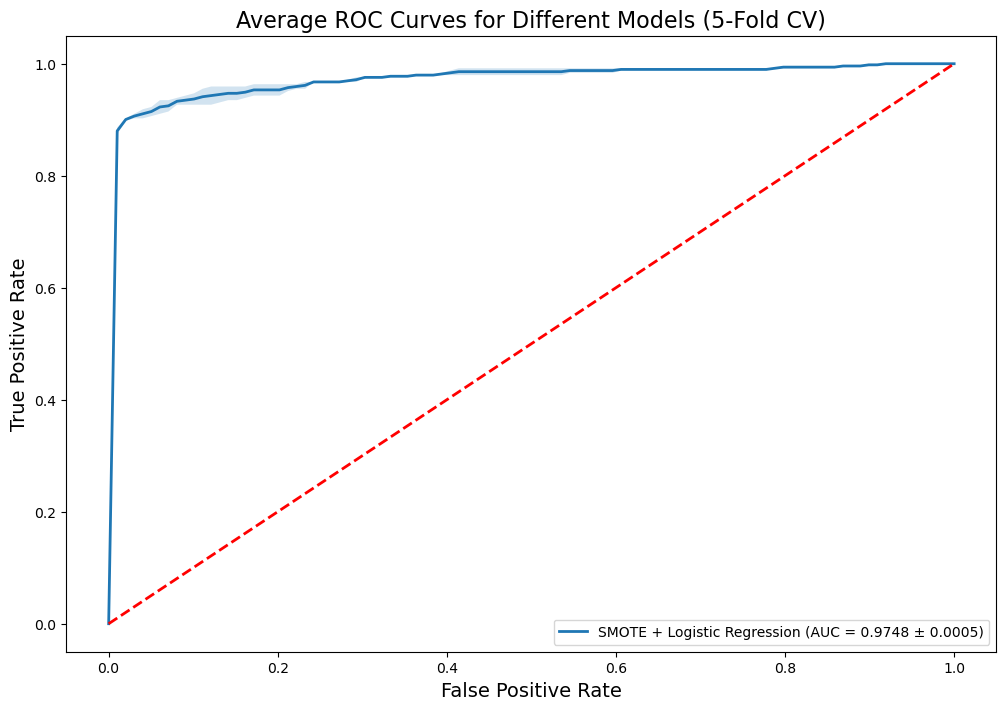

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
feature_names = X.columns  # Store feature names for later reference

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    #"RandomOverSampler": RandomOverSampler(sampling_strategy=1, random_state=42),
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    #"ADASYN": ADASYN(sampling_strategy=1, random_state=42),
    # "RandomUnderSampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
    # "NearMiss": NearMiss(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    #"Support Vector Machine": SVC(kernel="linear", probability=True),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot setup
plt.figure(figsize=(12, 8))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"\n=== Model: {model_name} ===")

        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        # Build the pipeline
        pipeline = Pipeline([
            ('sampler', sampler),
            ('feature_selection', RFE(estimator=model, n_features_to_select=5)),
            ('model', model)
        ])

        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Fit pipeline
            pipeline.fit(X_train, y_train)

            # Feature selection mask
            selected_mask = pipeline.named_steps['feature_selection'].support_
            selected_features = feature_names[selected_mask]
            print("Selected features:", list(selected_features))

            # Predict probabilities
            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

            # ROC and AUC
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            roc_auc = auc(fpr, tpr)

            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(roc_auc)

        # Calculate mean + std AUC
        mean_tpr = np.mean(tprs, axis=0)
        std_tpr = np.std(tprs, axis=0)
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)

        # Plot
        label = f"{sampler_name} + {model_name} (AUC = {mean_auc:.4f} ± {std_auc:.4f})"
        plt.plot(mean_fpr, mean_tpr, lw=2, label=label)
        plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'r--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Average ROC Curves for Different Models (5-Fold CV)', fontsize=16)
plt.legend(loc="lower right")

# Show plot
plt.show()

## Sampling Methods, Models, Feature Selection


### Sampler: SMOTE ###

=== Model: Logistic Regression ===
Selected features: ['V4', 'V11', 'V12', 'V14', 'V16']
Selected features: ['V4', 'V12', 'V14', 'V22', 'V26']


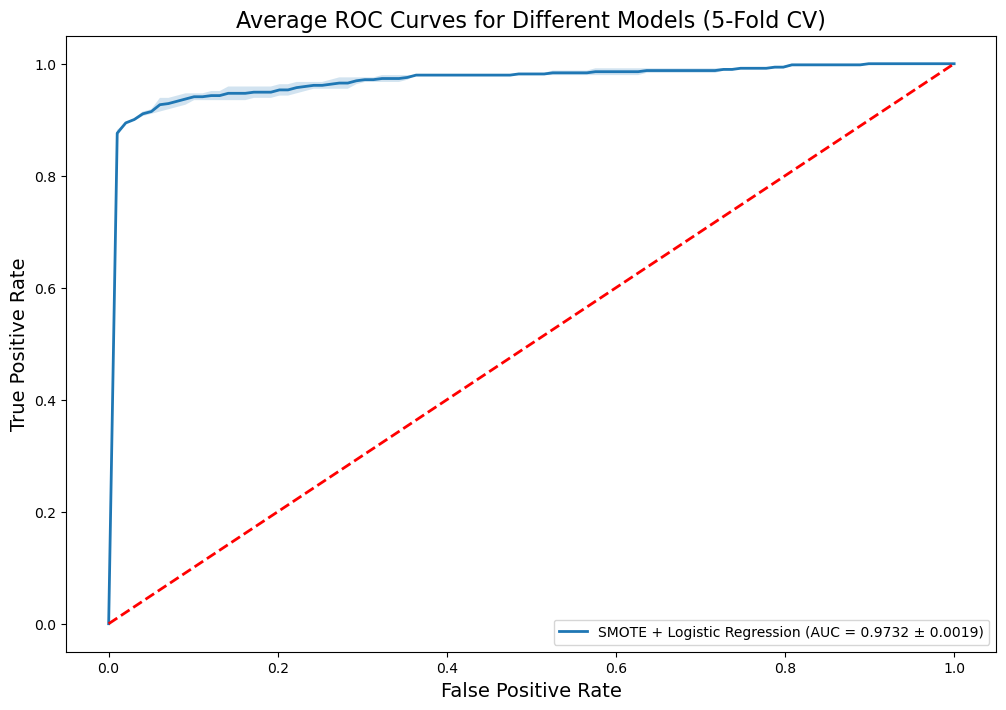

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']
feature_names = X.columns  # Store feature names for later reference

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    #"RandomOverSampler": RandomOverSampler(sampling_strategy=1, random_state=42),
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    #"ADASYN": ADASYN(sampling_strategy=1, random_state=42),
    # "RandomUnderSampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
    # "NearMiss": NearMiss(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    #"Support Vector Machine": SVC(kernel="linear", probability=True),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot setup
plt.figure(figsize=(12, 8))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for model_name, model in models.items():
        print(f"\n=== Model: {model_name} ===")

        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        # Build the pipeline
        pipeline = Pipeline([
            ('sampler', sampler),
            ('feature_selection', RFE(estimator=model, n_features_to_select=5)),
            ('model', model)
        ])

        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Fit pipeline
            pipeline.fit(X_train, y_train)

            # Feature selection mask
            selected_mask = pipeline.named_steps['feature_selection'].support_
            selected_features = feature_names[selected_mask]
            print("Selected features:", list(selected_features))

            # Predict probabilities
            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

            # ROC and AUC
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            roc_auc = auc(fpr, tpr)

            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(roc_auc)

        # Calculate mean + std AUC
        mean_tpr = np.mean(tprs, axis=0)
        std_tpr = np.std(tprs, axis=0)
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)

        # Plot
        label = f"{sampler_name} + {model_name} (AUC = {mean_auc:.4f} ± {std_auc:.4f})"
        plt.plot(mean_fpr, mean_tpr, lw=2, label=label)
        plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'r--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Average ROC Curves for Different Models (5-Fold CV)', fontsize=16)
plt.legend(loc="lower right")

# Show plot
plt.show()


=== Logistic Regression ===

=== Support Vector Machine ===

=== Random Forest ===


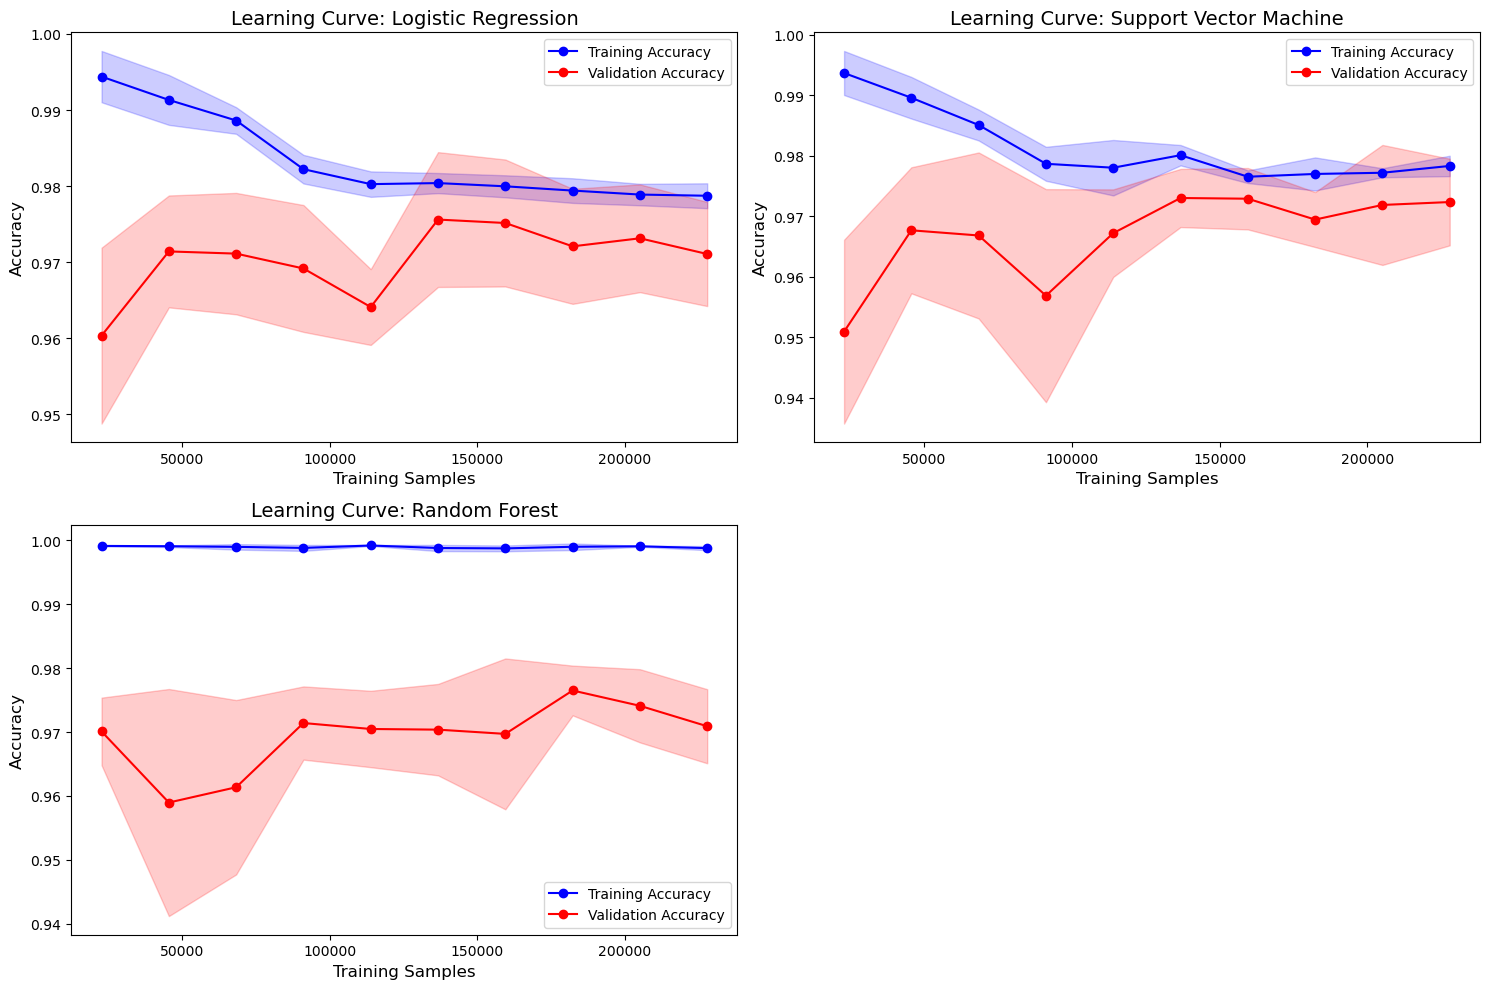

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']
feature_names = X.columns  # Store feature names for later reference

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot setup
plt.figure(figsize=(15, 10))

# Loop through models to plot learning curves
for i, (model_name, model) in enumerate(models.items(), 1):
    print(f"\n=== {model_name} ===")

    # Initialize pipeline with undersampling and RFE
    pipeline = Pipeline([
        ('under_sampler', RandomUnderSampler(sampling_strategy=1, random_state=42)),
        ('feature_selection', RFE(estimator=model, n_features_to_select=5)),  # RFE stage
        ('model', model)
    ])

    # Compute learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X, y, cv=skf, scoring='roc_auc' , n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Compute mean and standard deviation of training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.subplot(2, 2, i)
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

    plt.xlabel("Training Samples", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(f"Learning Curve: {model_name}", fontsize=14)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Noticeable gap between training and validation accuracy for Random Forest, indicating overfitting

In [18]:
# Split data into train and test sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get equal number of normal and fraud cases
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [59]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

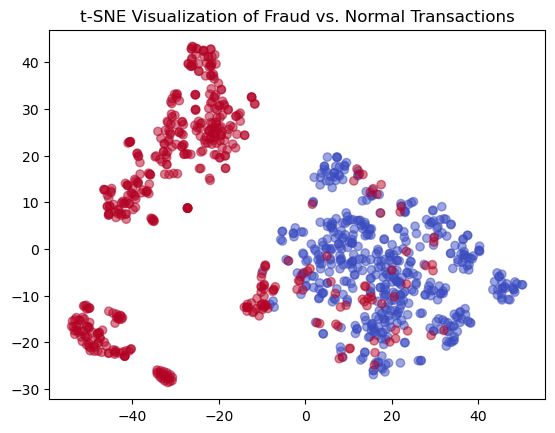

In [ ]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_resampled)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_resampled, cmap="coolwarm", alpha=0.5)
plt.title("t-SNE Visualization of Fraud vs. Normal Transactions")
plt.show()

In [15]:
X_resampled.head()

V1        V2        V3        V4        V5        V6        V7  \
106396  1.284213 -0.501464 -0.357034 -2.105217 -0.438960 -1.008206  0.096926   
238046  0.155404 -0.039331 -0.563432 -0.478156  0.985475  0.859321  0.577935   
107344  1.135878  0.029953  0.323076  1.133289 -0.174560  0.004576 -0.148293   
274061  1.992833  0.144782 -1.618801  1.410094  0.373586 -1.152419  0.642564   
271673 -0.385451  0.672831  0.987344 -0.948938  0.740487 -0.150095  1.075317   

              V8        V9       V10  ...       V21       V22       V23  \
106396 -0.295436  1.930483 -1.638090  ... -0.202416 -0.393263 -0.207654   
238046  0.379662  0.023975 -0.401163  ...  0.507181  1.405727  0.137711   
107344  0.061964  0.283051  0.013872  ...  0.195802  0.553511 -0.213152   
274061 -0.402493  0.258189  0.260896  ...  0.056648  0.332903 -0.013404   
271673 -0.279940  0.370106 -0.805037  ...  0.008414  0.307288 -0.567814   

             V24       V25       V26       V27       V28  scaled_amount  \
106396 -0.405794  0.817223 -0.851350  0.059367  0.023643       0.489206   
238046 -1.434481 -0.521119 -0.049328  0.049098 -0.030566       0.915671   
107344 -0.424880  0.640881 -0.125404  0.034163  0.021453       0.302662   
274061 -0.017312  0.438219 -0.490139 -0.020661 -0.059648       0.069867   
271673  0.657006  1.060964  0.270908 -0.389675 -0.300019      -0.167680   

        scaled_time  
106396    -0.173193  
238046     0.761405  
107344    -0.167988  
274061     0.953312  
271673     0.939767  

[5 rows x 30 columns]

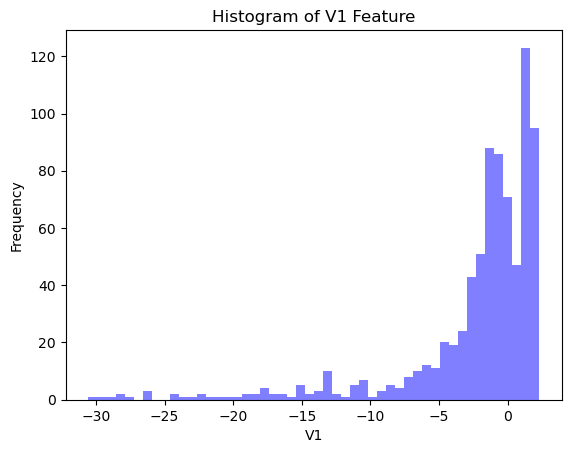

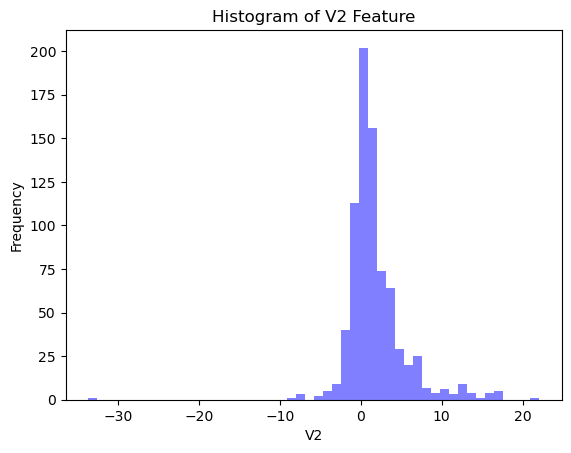

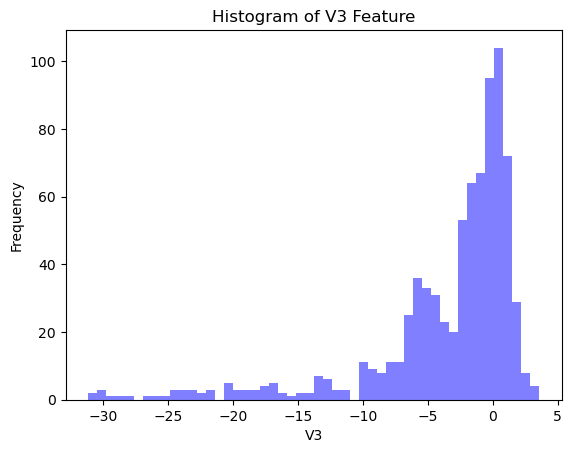

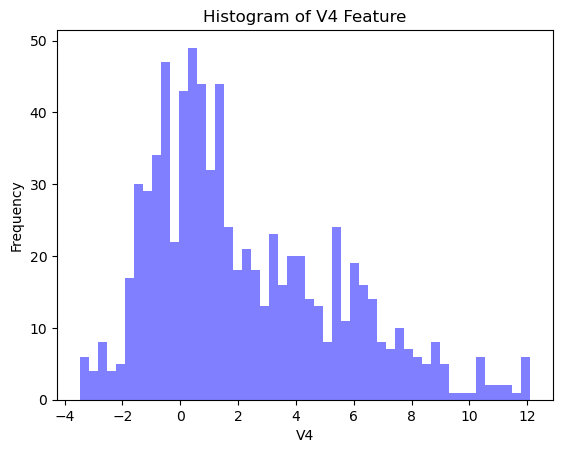

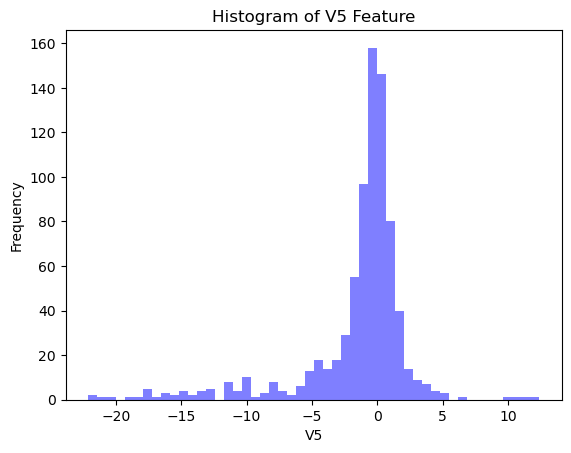

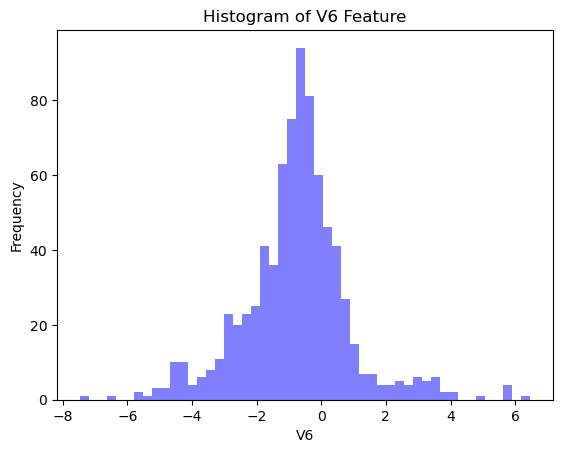

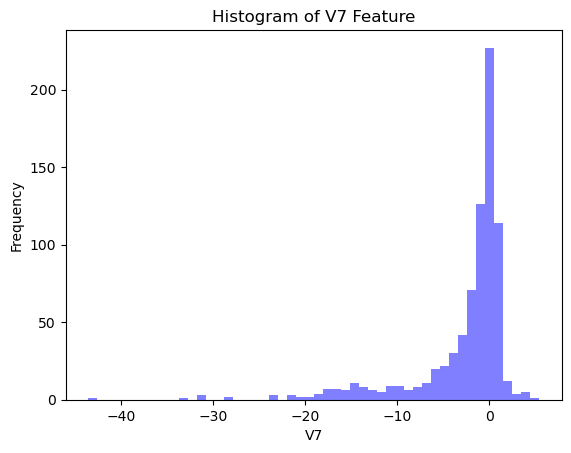

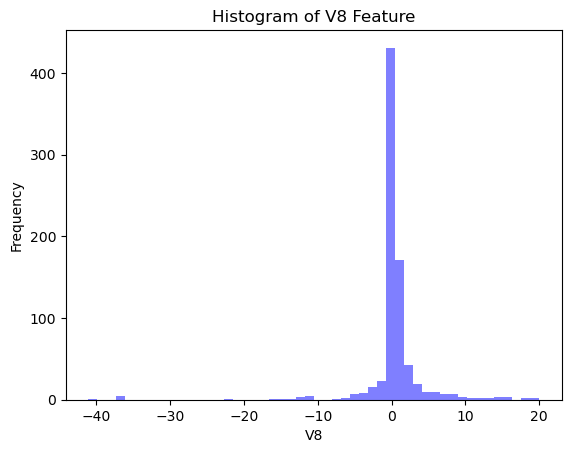

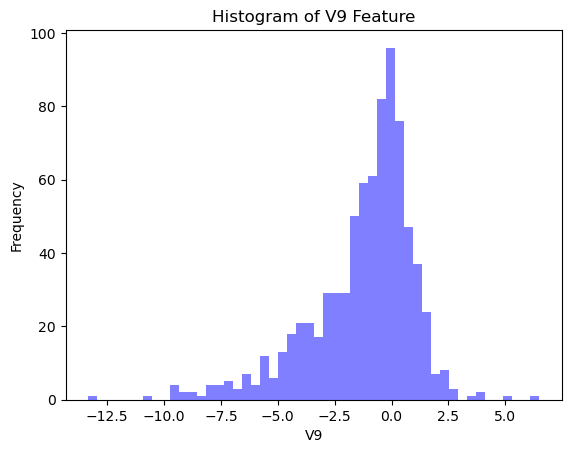

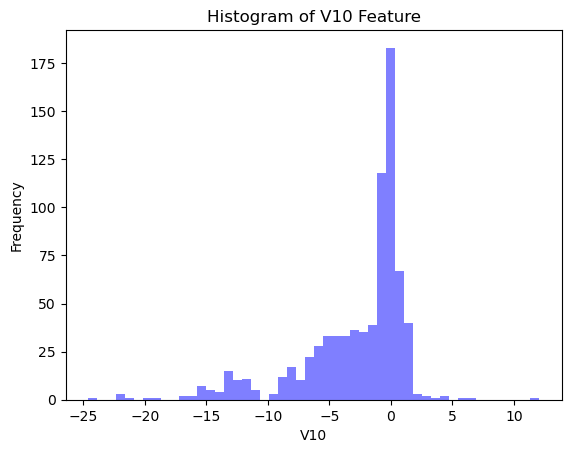

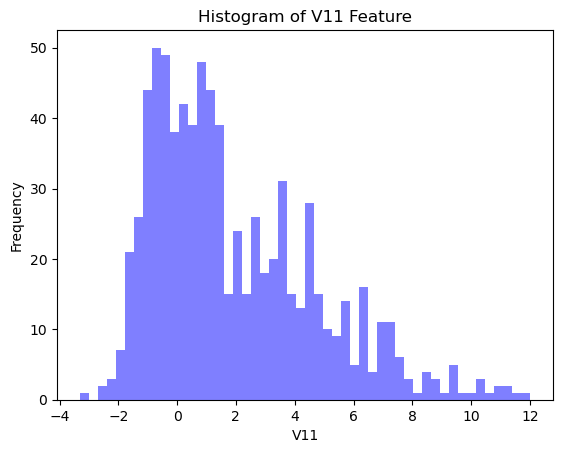

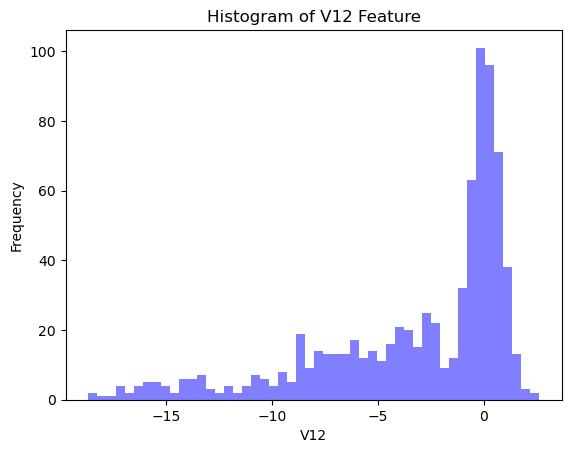

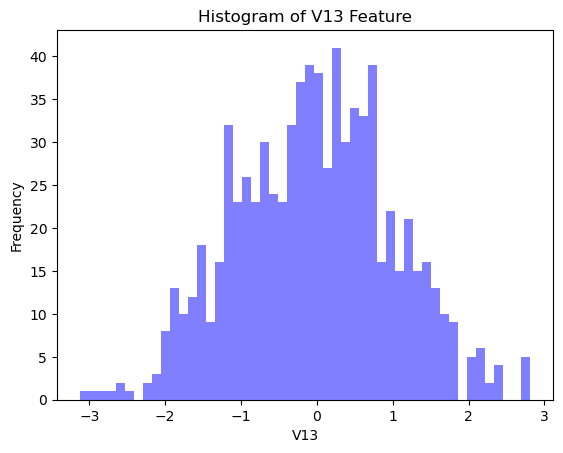

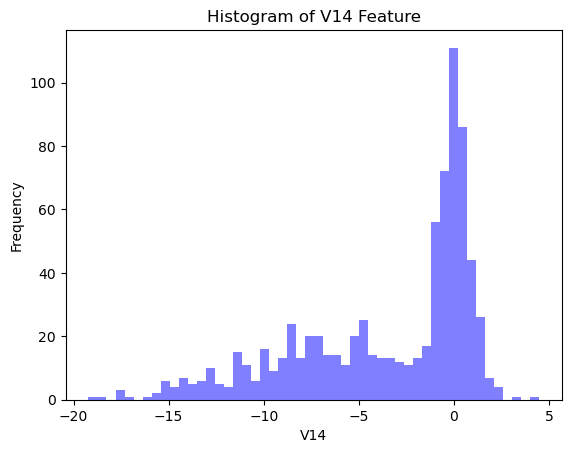

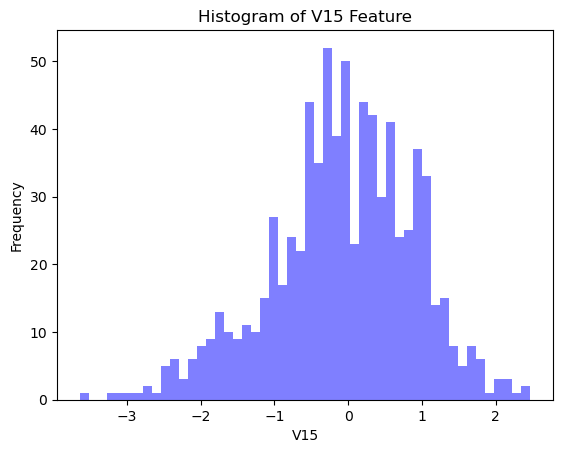

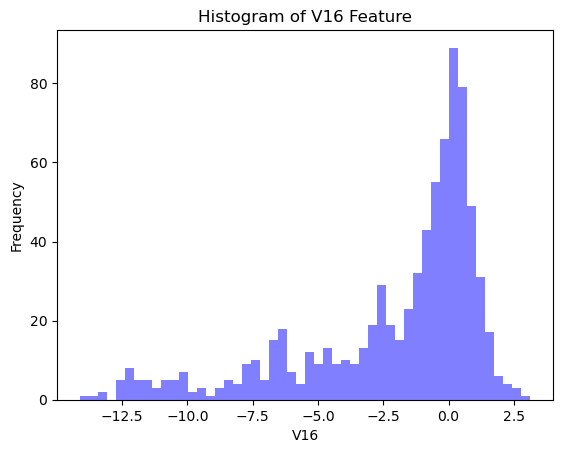

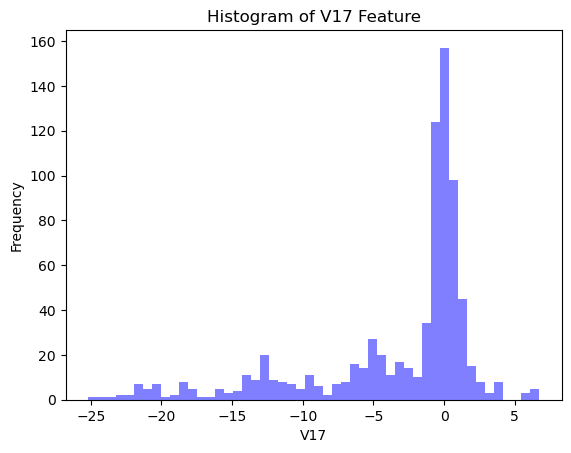

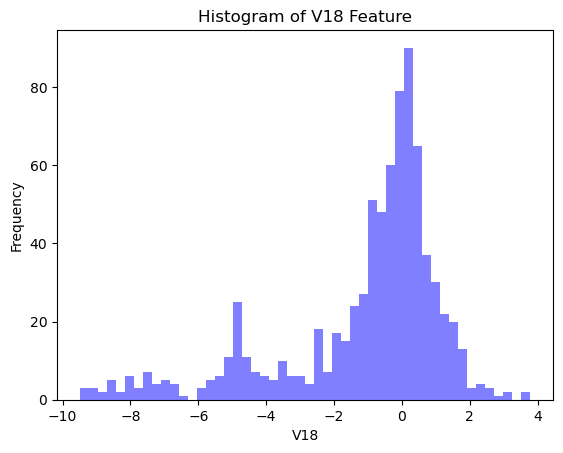

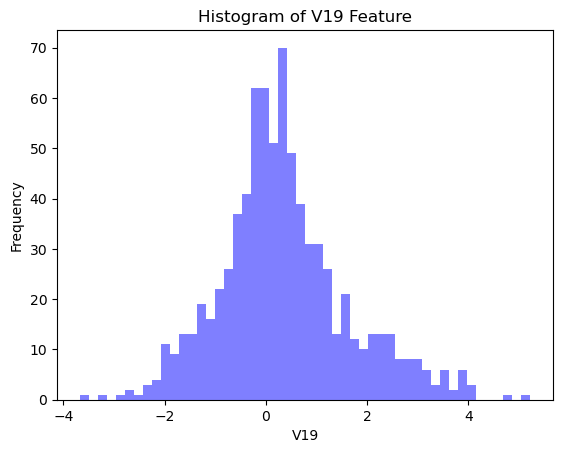

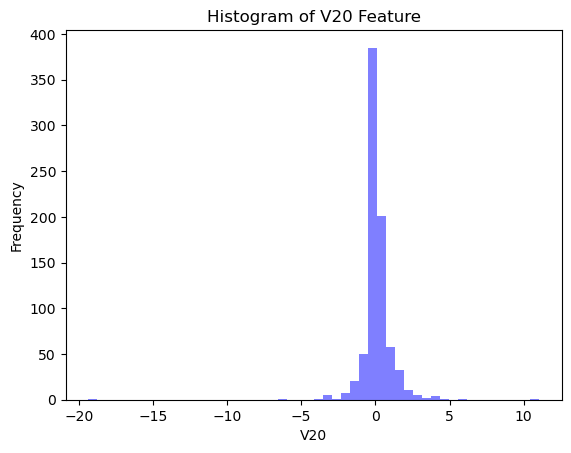

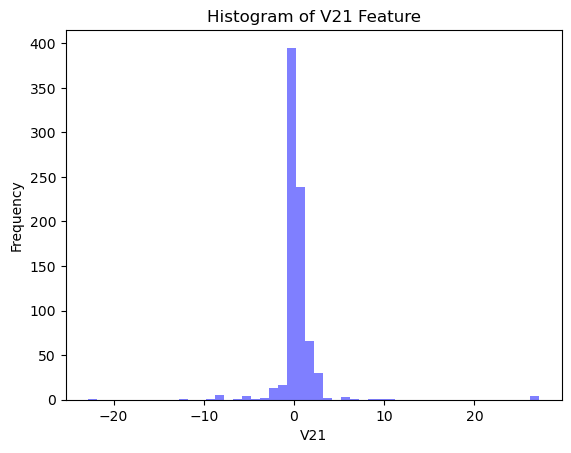

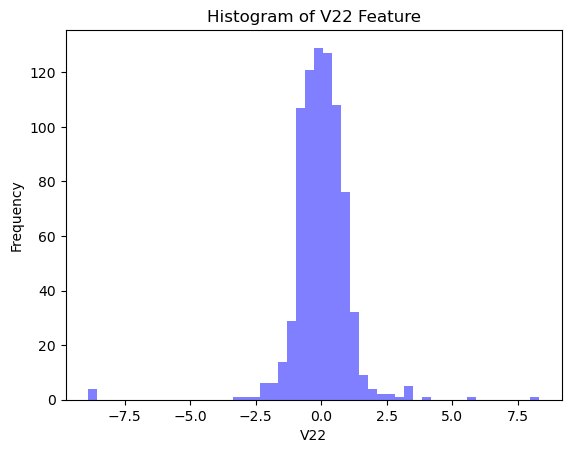

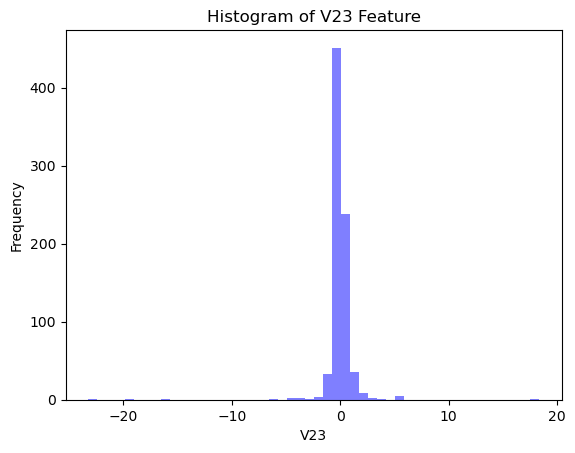

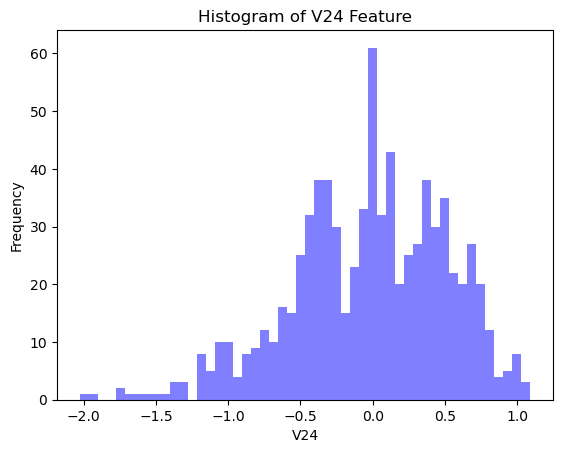

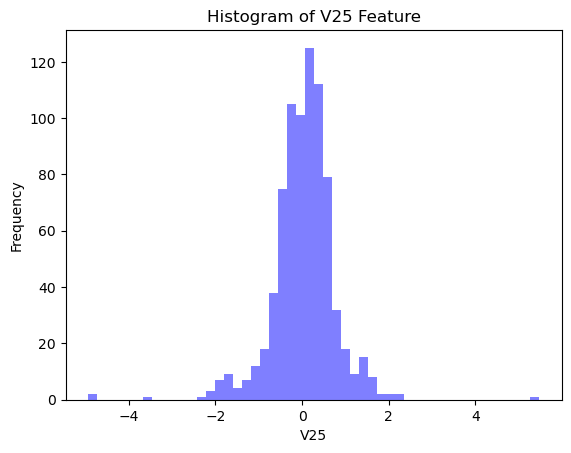

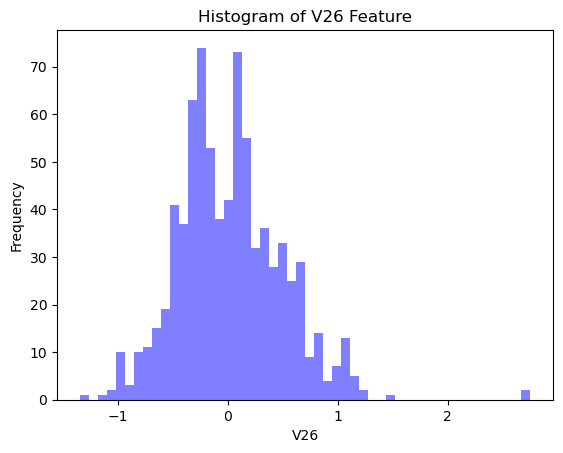

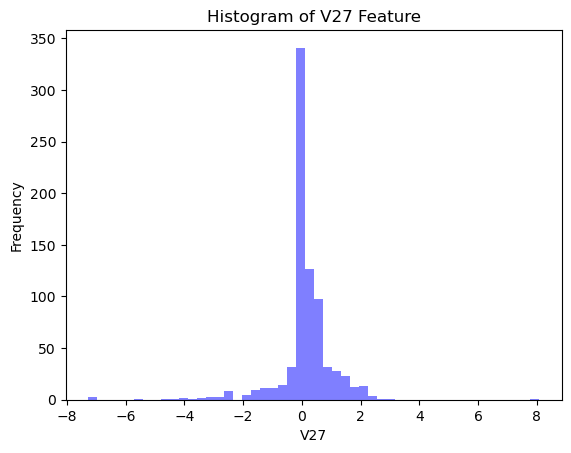

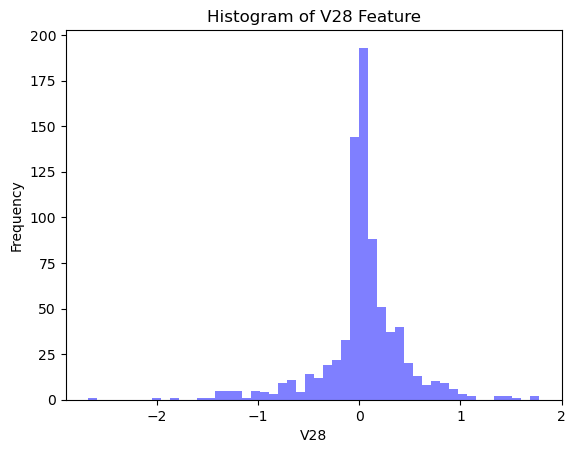

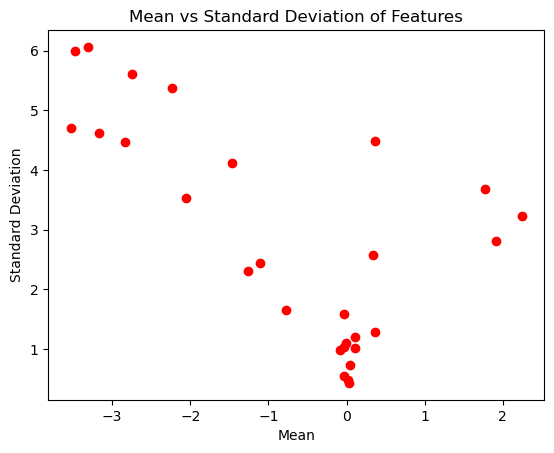

In [17]:
# Make histogram of features
for i in range(28):
    plt.hist(X_resampled.iloc[:, i], bins=50, color="blue", alpha=0.5)
    plt.xlabel("V" + str(i + 1))
    plt.ylabel("Frequency")
    plt.title("Histogram of V" + str(i + 1) + " Feature")
    plt.show()

# Get std dev and mean of V1 rounded to 2 decimal places
list_std = []
list_mean = []
for i in range(28):
    std = round(X_resampled.iloc[:, i].std(), 2)
    mean = round(X_resampled.iloc[:, i].mean(), 2)
    list_std.append(std)
    list_mean.append(mean)
    #print("V" + str(i + 1) + " std dev:", std)
    #print("V" + str(i + 1) + " mean:", mean)

# scatter plot of mean and std dev
plt.scatter(list_mean, list_std, color="red")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.title("Mean vs Standard Deviation of Features")
plt.show()